# Problem Statement

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

# Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

# Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

**Booking_ID**: the unique identifier of each booking \
**no_of_adults**: Number of adults \
**no_of_children**: Number of Children \
**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel \
**no_of_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel \
**type_of_meal_plan**: Type of meal plan booked by the customer: \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Not Selected – No meal plan selected \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Meal Plan 1 – Breakfast \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Meal Plan 2 – Half board (breakfast and one other meal) \
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Meal Plan 3 – Full board (breakfast, lunch, and dinner) \
**required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes) \
**room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group \
**lead_time**: Number of days between the date of booking and the arrival date \
**arrival_year**: Year of arrival date \
**arrival_month**: Month of arrival date \
**arrival_date**: Date of the month \
**market_segment_type**: Market segment designation. \
**repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes) \
**no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer before the current booking \
**no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer before the current booking \
**avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros) \
**no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc) \
**booking_status**: Flag indicating if the booking was canceled or not. \

## Import Libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 scikit-learn -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

In [ ]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

Mounted at /content/drive


# Exploratory Data Analysis

## Reading Data

In [ ]:
# Reading csv file containing data
data = pd.read_csv("INNHotelsGroup.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Checking Data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Since required_car_parking_space, arrival_year, arrival_month, repeated_guest should be categorical in nature. Hence, these columns should be converted into object dtype

In [ ]:
data["required_car_parking_space"] = data["required_car_parking_space"].astype('object')
data["arrival_year"] = data["arrival_year"].astype('object')
data["arrival_month"] = data["arrival_month"].astype('object')
data["repeated_guest"] = data["repeated_guest"].astype('object')

In [ ]:
# Statistical summary of the data
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,15.596995,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,85.930817,8.740447,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,8.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,16.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,23.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,31.000000,13.000000,58.000000,540.000000,5.000000


## Finding missing values

In [ ]:
## Finding missing values
data.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


There are no missing values in the data

## Univariate Analysis

In [ ]:
def plot_histogram_countplot_boxplot(col_name, histplot=False, hue=None):
  counts = data[col_name].value_counts().sort_index().tolist()
  fig, axes = plt.subplots(2,1,figsize=(15,10))
  if histplot == True:
    count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue, palette="Spectral")
  else:
    count_plot = sns.countplot(data=data, x=col_name, ax=axes[0], palette="Spectral");
  if hue == None and histplot==False:
    for i,count_ in enumerate(counts):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  axes[0].axvline(x=data[col_name].mean(), color="r")

  box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue, palette="Spectral")
  return count_plot

In [ ]:
def plot_countplot(col_name, data=data, labels=None, rotation=0, hue=None):
  counts = data[col_name].value_counts().sort_index()
  if hue != None:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=hue, palette="Spectral");
  else:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=col_name, palette="Spectral");
    for i,count_ in enumerate(counts.tolist()):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  if labels != None:
    count_plot.set_xticklabels(labels, rotation=rotation)
  else:
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);


#### Booking_ID

In [ ]:
data["Booking_ID"].nunique()

36275

There are 36275 unique Booking IDs

#### no_of_adults

<Axes: xlabel='no_of_adults', ylabel='count'>

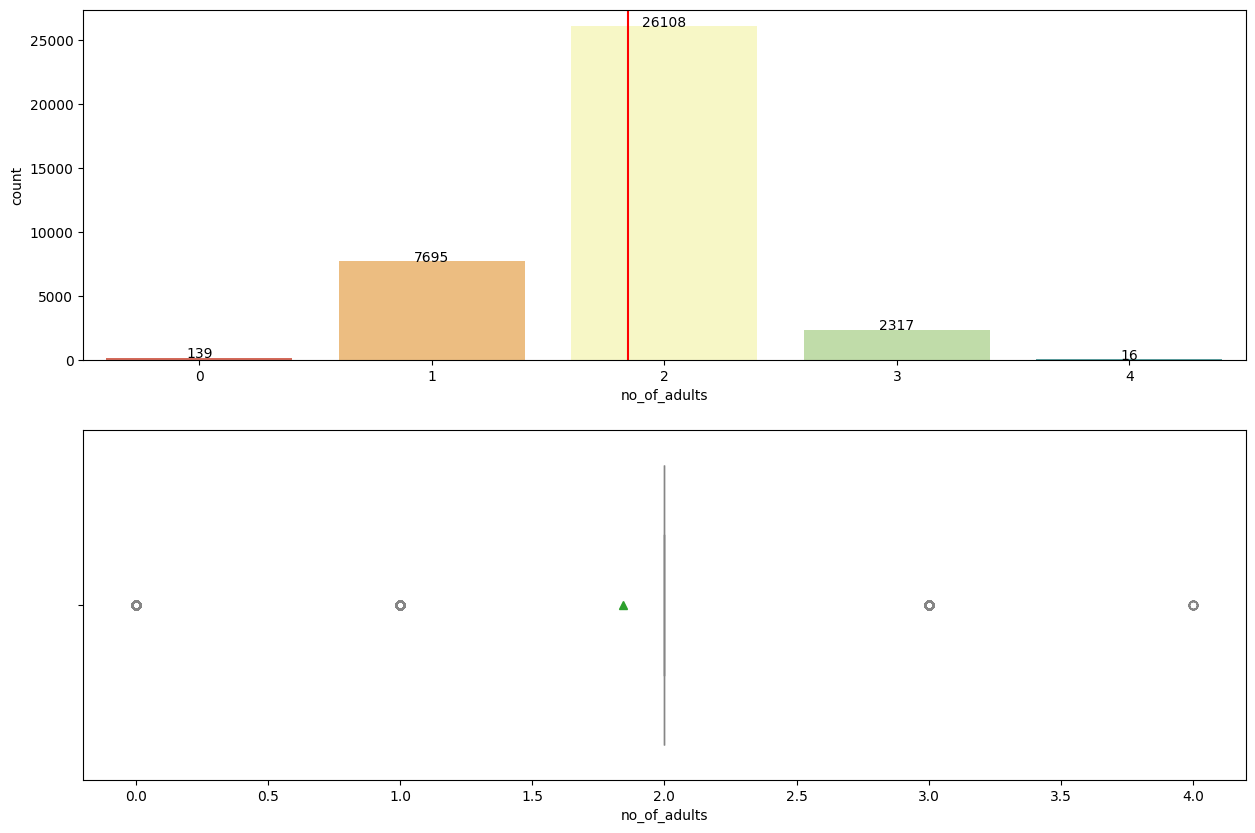

In [ ]:
plot_histogram_countplot_boxplot("no_of_adults")

There are 26108 bookings with 2 adults.
Majority of the bookings are done for **two adults** followed by **one adult**. Bookings with **zero adults** bookings with **4 adults** are very less(almost seems like an outlier). However the boxplot also indicates bookings with **1 adults** and **3 adults** are very less comparitively to 2 adults(also indicating outliers).

#### no_of_children

<Axes: xlabel='no_of_children', ylabel='count'>

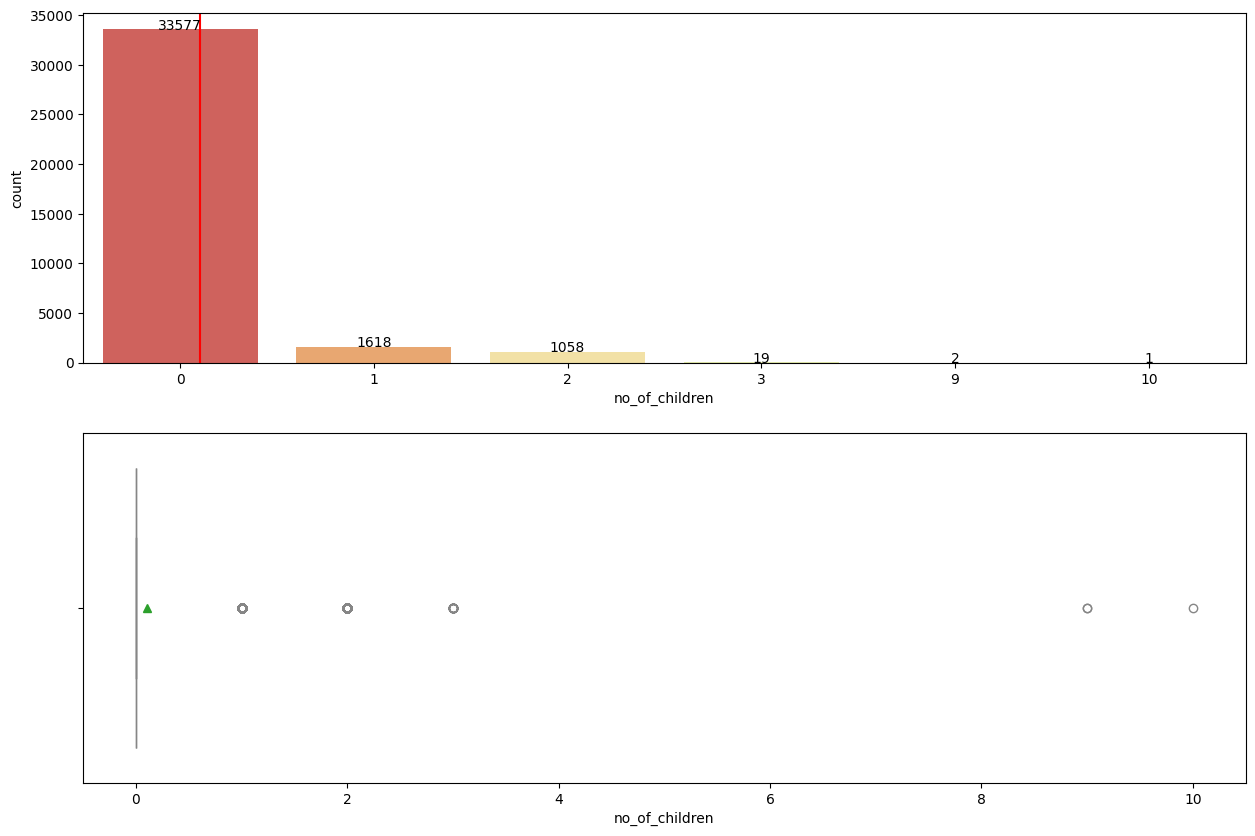

In [ ]:
plot_histogram_countplot_boxplot("no_of_children")

~92% of the bookings were not done for children. Bookings done with 1 child and 2 children were done majorly, however the number of bookings are still very less in comparison.

#### no_of_weekend_nights

<Axes: xlabel='no_of_weekend_nights', ylabel='count'>

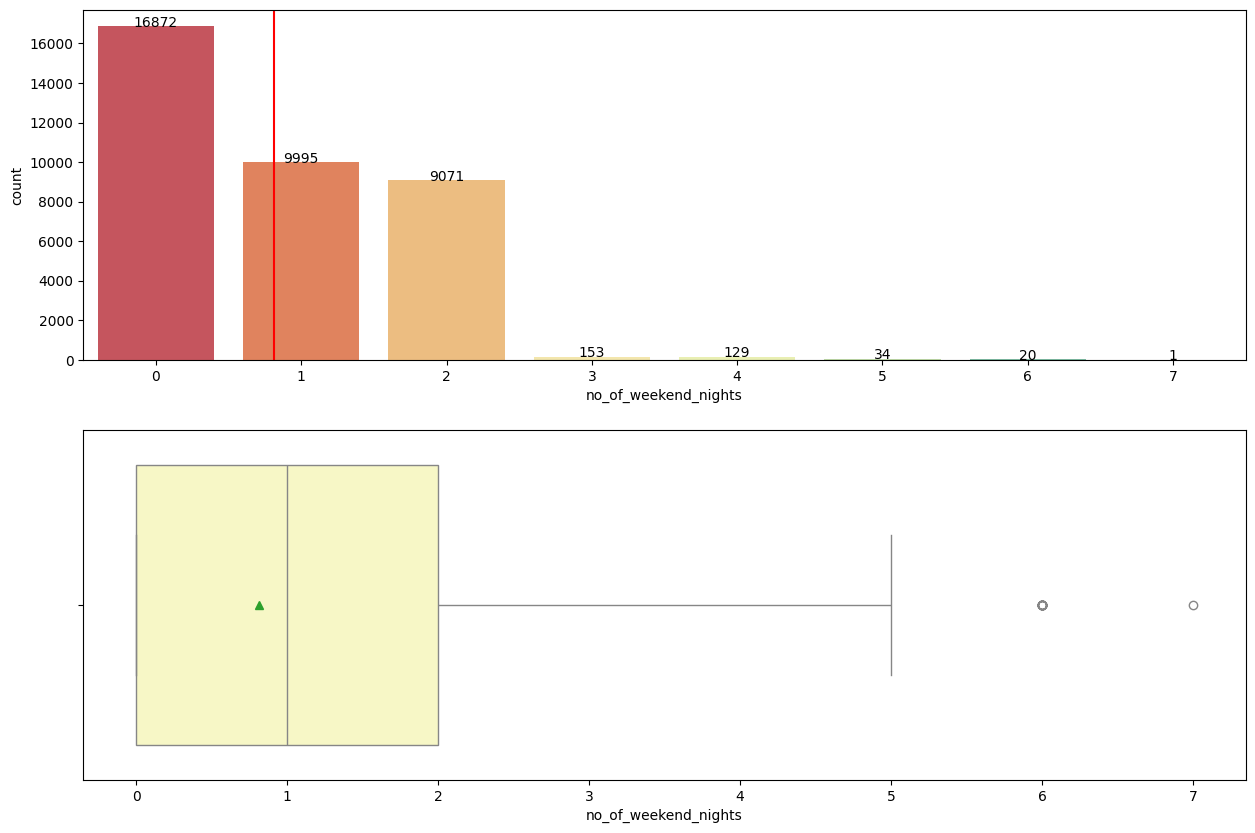

In [ ]:
plot_histogram_countplot_boxplot("no_of_weekend_nights")

Majority of the bookings were not done for weekend nights. Followed by just 1 and 2 weekend nights indicating either Saturday/ Suday nights only. There are very few 3 or more day weekends hence the number of bookings is less. Booking for 5 and more days are outliers

#### no_of_week_nights

<Axes: xlabel='no_of_week_nights', ylabel='count'>

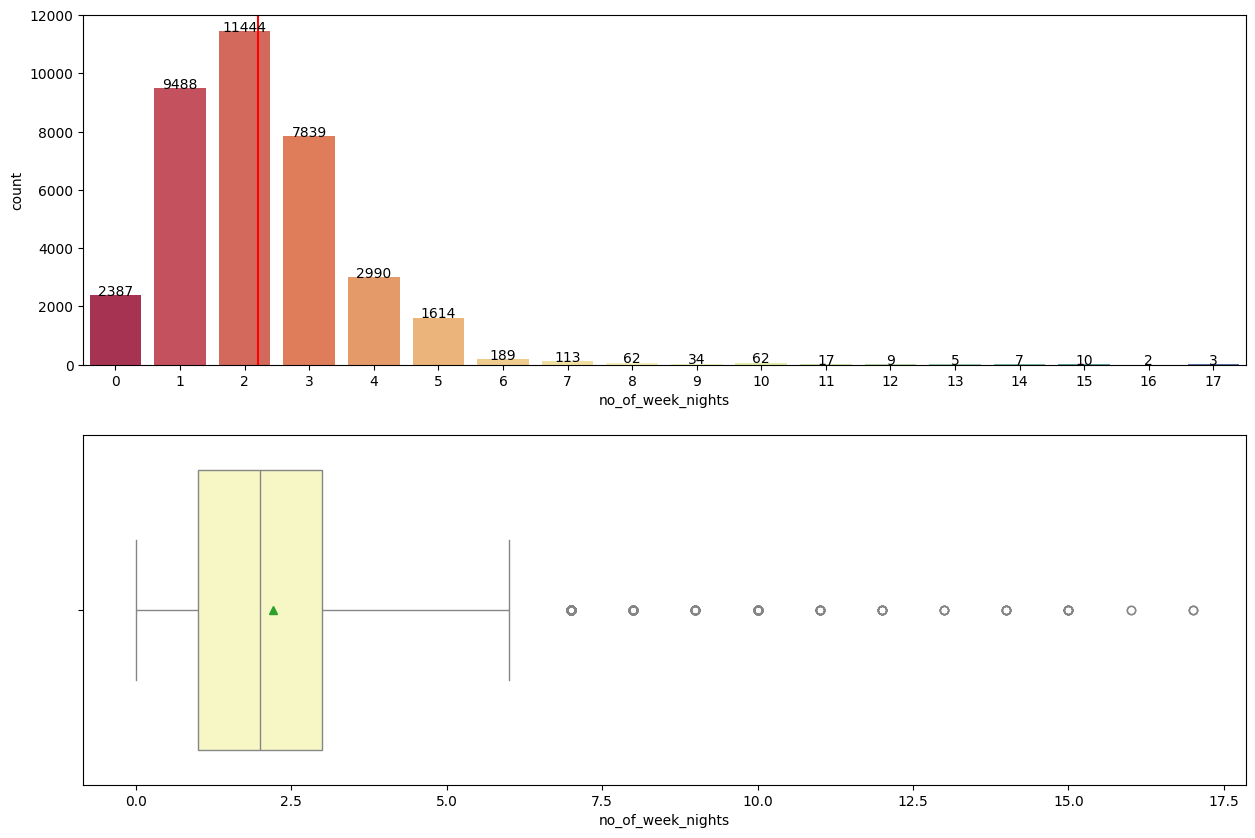

In [ ]:
plot_histogram_countplot_boxplot("no_of_week_nights")

Average number of week days that are booked is around **2 days**. Most of the booking lies between 0 and 6 days and outliers are beyond 6 week nights. This shows that most of the bookings are wrapped up in a week and the customers don't prefer to stay in the hotel for more than a week

#### type_of_meal_plan

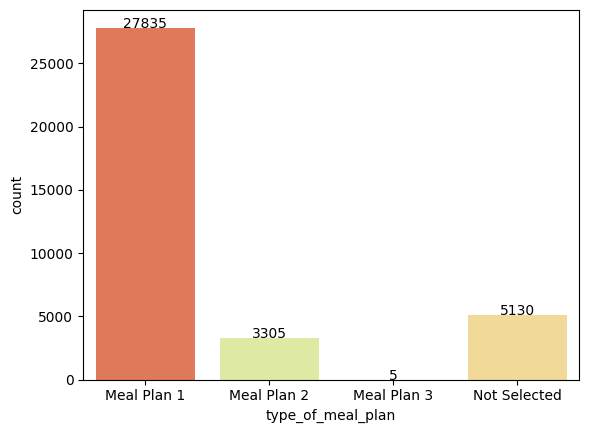

In [ ]:
plot_countplot("type_of_meal_plan")

27835 bookings included Meal Plan 1 and 5130 bookings did not include any meal plans. 3305 bookings include Meal plan 2 as well. Only 5 meal plans include Meal Plan 3. This indicates that Meal Plan 2 and Meal Plan 3 are comparatively priced higher and are not an affordable meal option

#### required_car_parking_space

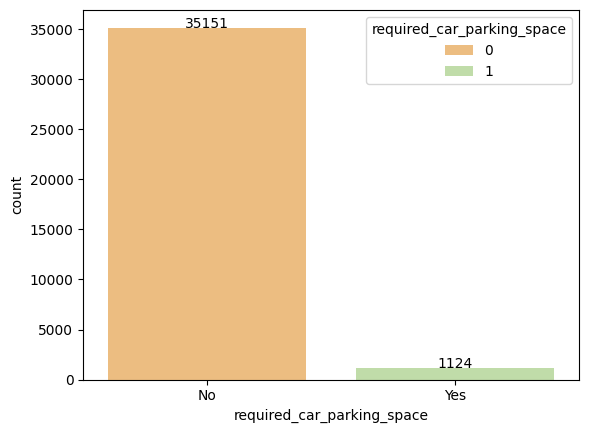

In [ ]:
plot_countplot("required_car_parking_space", labels=["No", "Yes"], rotation=0)

~97%(35151) of the bookings do not require car parking space and 2%(1124) of the bookings require car bookings. This implies that most of the booking is done by people coming from distances that cannot be travelled by car

#### room_type_reserved

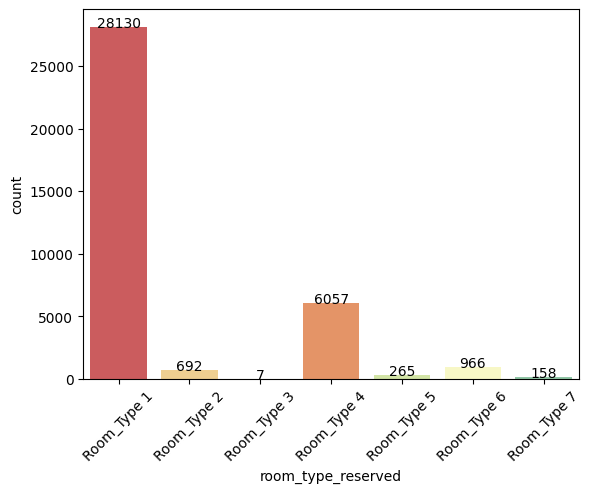

In [ ]:
plot_countplot("room_type_reserved", rotation = 45)

**Room Type 1** is most preferred by the customers. \
**Room Type 4** is second most preferred by the customers. \
Other Room Types are not preffered much by the customers

#### lead_time

<Axes: xlabel='lead_time', ylabel='Count'>

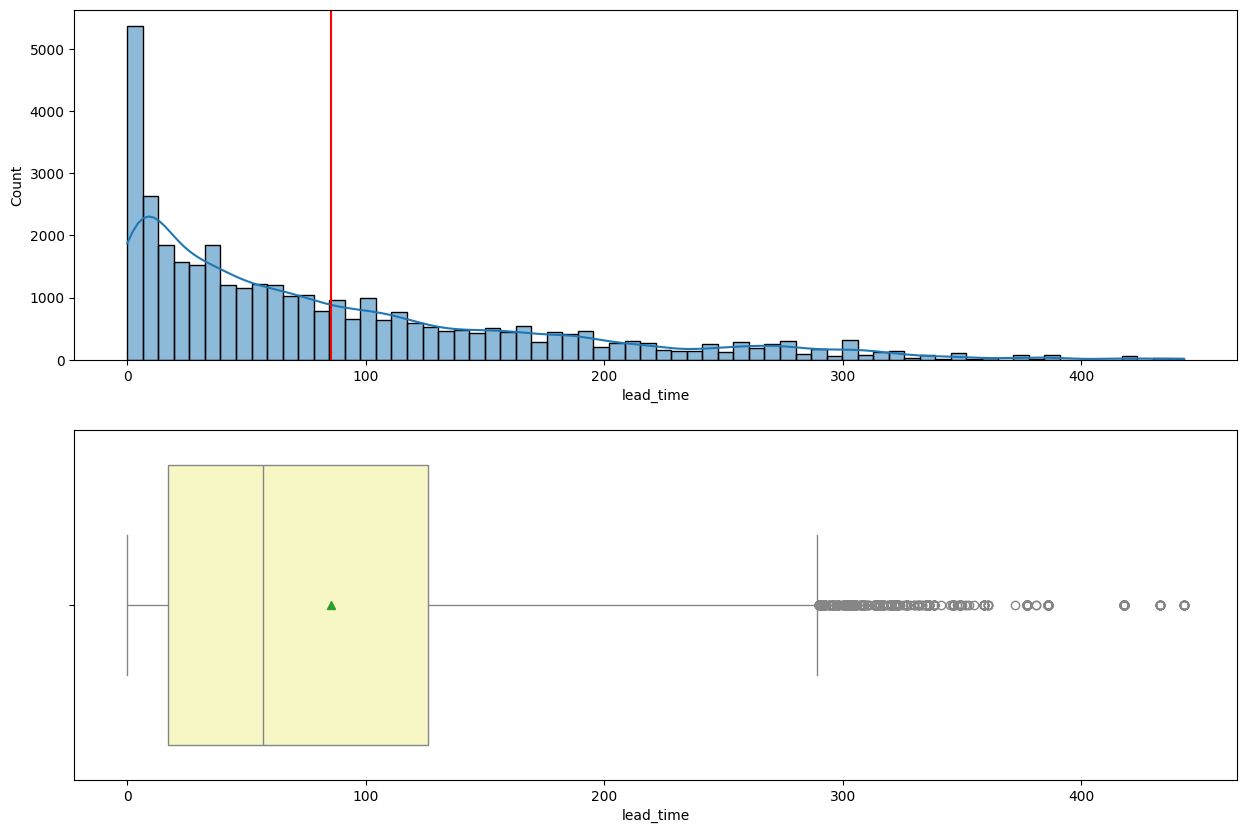

In [ ]:
plot_histogram_countplot_boxplot("lead_time", histplot=True)

Lead_Time distribution is a right skewed distribution indicating that many people are booking their rooms on the whim and there are very few customers who are booking rooms well in advanced.
The median time is **~60 days** \
Customers who book beyond 300 days before are considered outliers. These customers can also be considered as tourists who plan their very well in advance

#### arrival_date

<Axes: xlabel='arrival_date', ylabel='Count'>

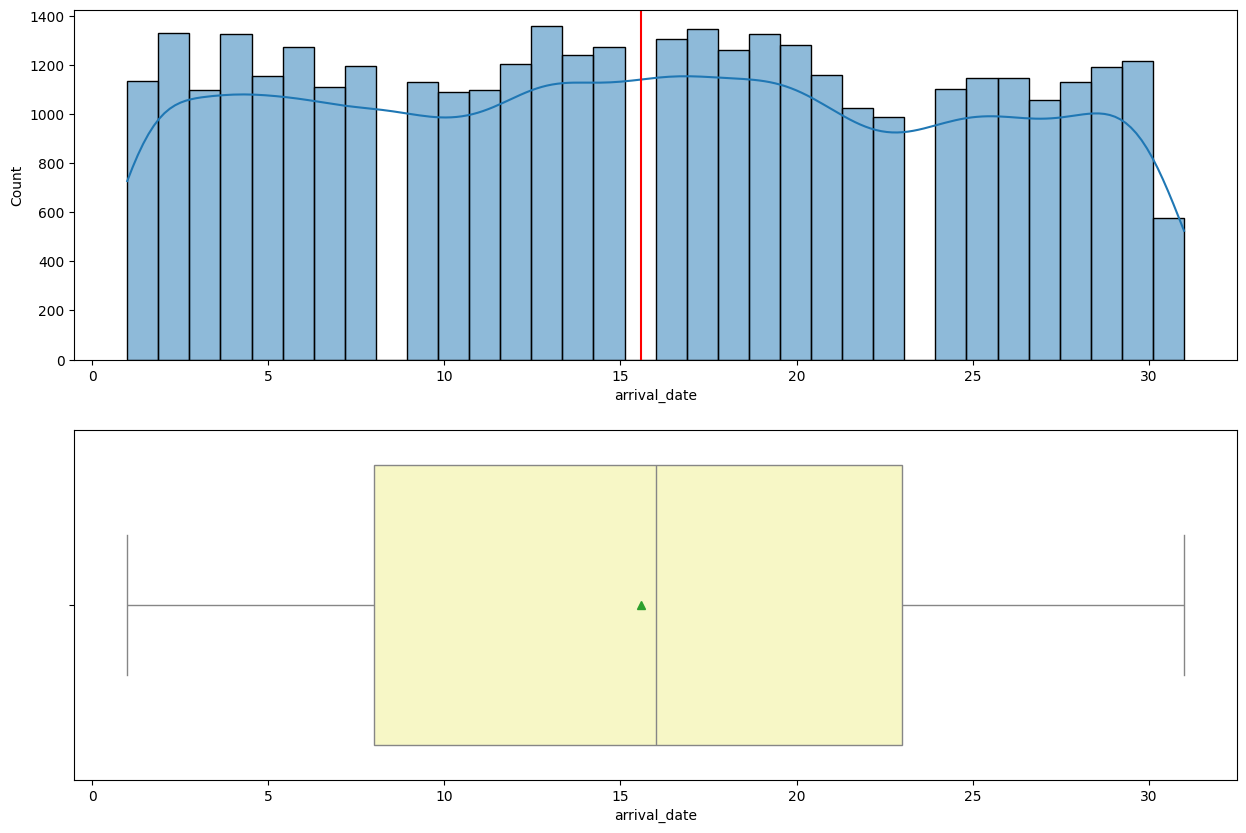

In [ ]:
plot_histogram_countplot_boxplot("arrival_date", histplot=True)

This distribution is uniform distirubution implying that there is not much variation among the bookings done on each day. \
The bookings occur on all days of the month. On average, customers prefer booking in the middle of the month(~ 15th of the month). However End of the month also sees a spike in the number of bookings.

#### arrival_month

<Axes: xlabel='arrival_month', ylabel='count'>

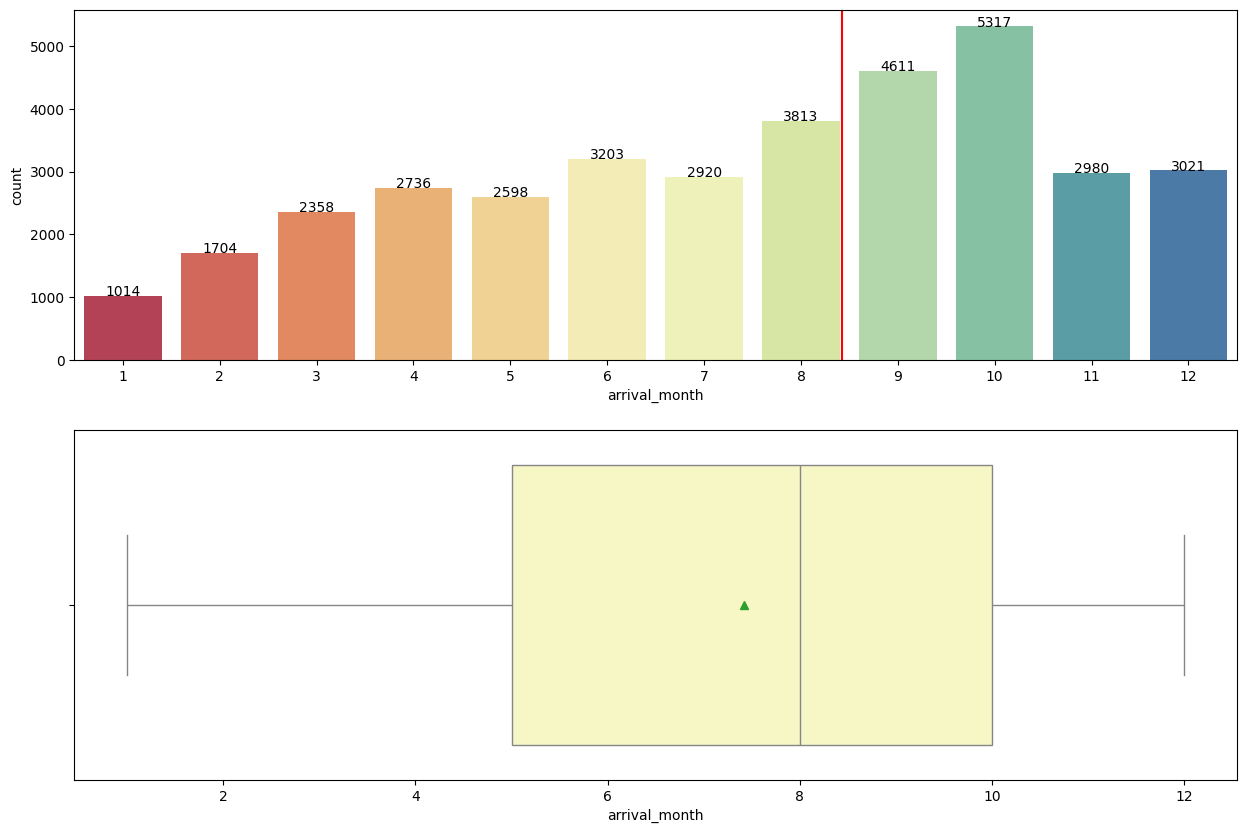

In [ ]:
plot_histogram_countplot_boxplot("arrival_month")

The distribution for arrival month is a slightly left skewed distribution where we can see more number of bookings have occured in the later part of the year. This can be attributed to the festival season and col weather related to the later half of the year

#### arrival_year

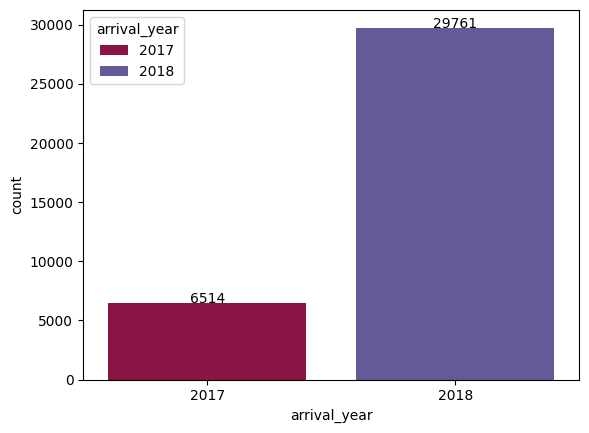

In [ ]:
plot_countplot("arrival_year")

Majority of the bookings have been done in 2018. \
Very few bookings have been done in 2017

#### market_segment_type

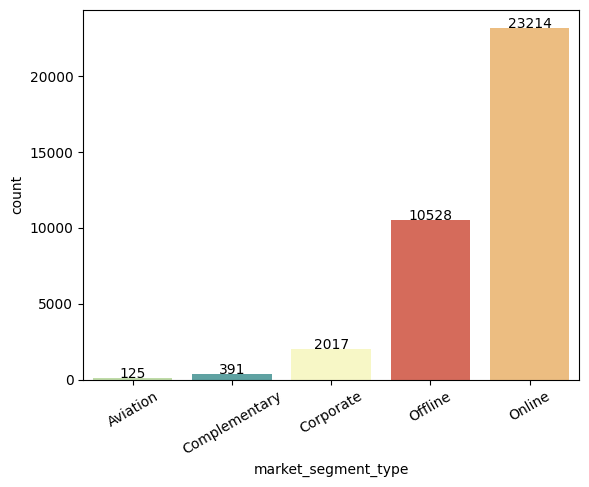

In [ ]:
plot_countplot("market_segment_type", rotation=30)

Online Mode of Booking is most preferred among the customers followed by Offline method. \
Corporate bookings are also comparatively. \
Least preffered are Aviation and Complementary which would indicate that the guests are invited to the hotel or offered the maximum discounts to try out the hotel

#### repeated_guest

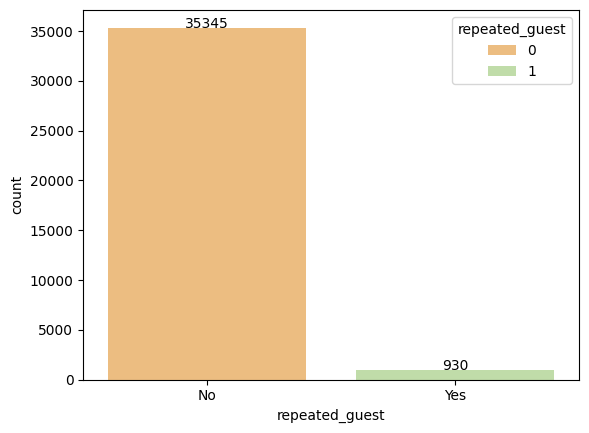

In [ ]:
plot_countplot("repeated_guest", labels = ["No", "Yes"])

35345 guests out of 36275 have not visited the hotel again. \
930 guest have returned to the hotel. \
This is very low churn rate for a hotel. \

#### no_of_previous_cancellations

<Axes: xlabel='no_of_previous_cancellations', ylabel='count'>

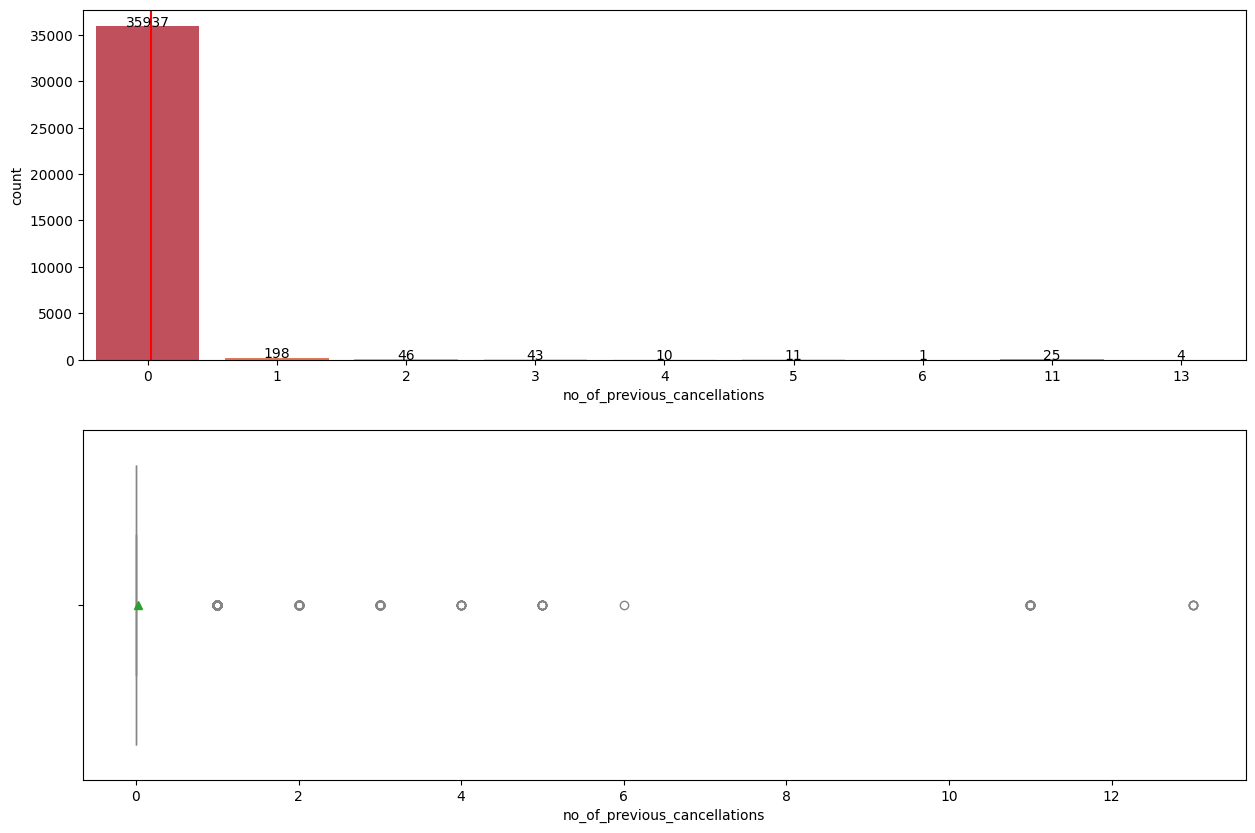

In [ ]:
plot_histogram_countplot_boxplot("no_of_previous_cancellations")

99% of the bookings are done where zero bookings were cancelled. This would indicate that these bookings are not done by returing users.
There 31 bookings that indicate 10+ bookings were cancelled before the current booking. \

The boxplot also shows that previous bookings getting cancelled is not normal behaviour of the customers and these are outliers

#### no_of_previous_bookings_not_canceled

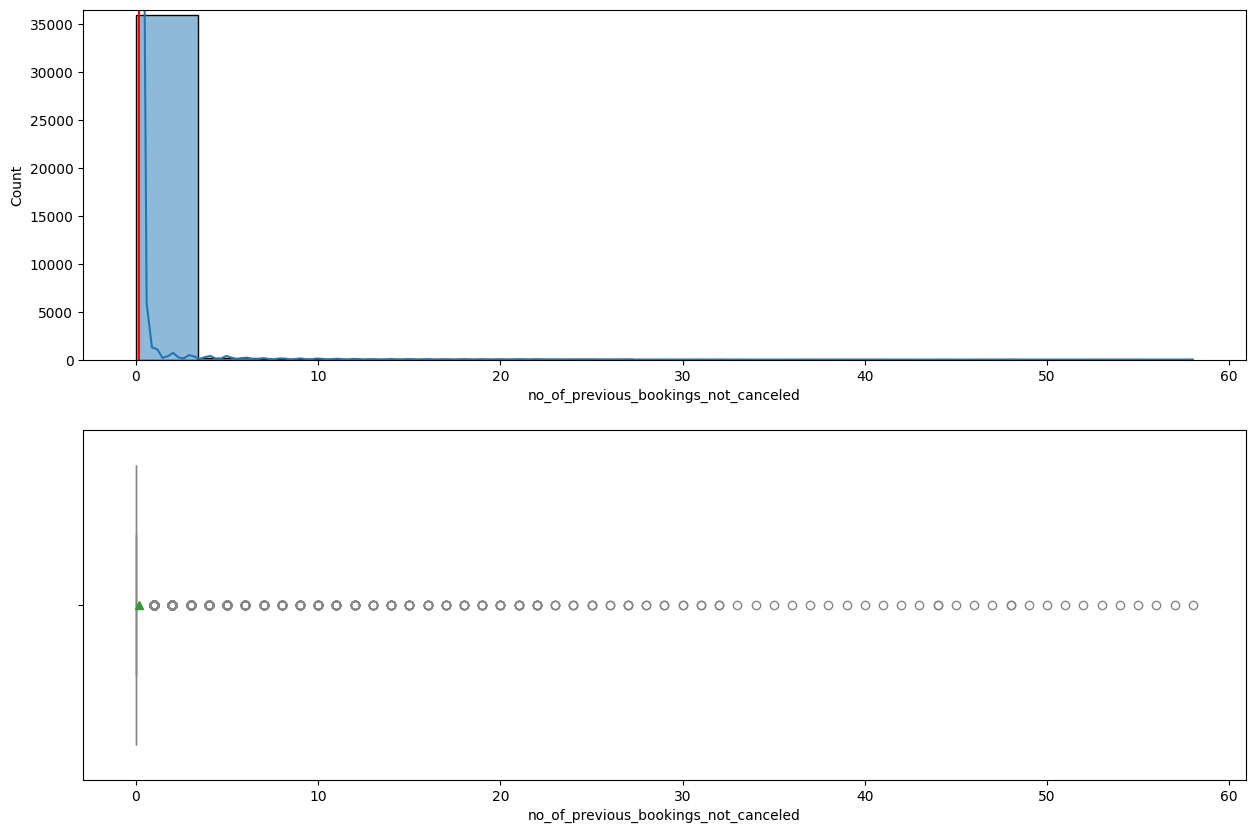

In [ ]:
plot_histogram_countplot_boxplot("no_of_previous_bookings_not_canceled", histplot=True).set(ylim=(0,36500));

35000+ bookings are such that the previous bookings were not cancelled.\
Any bookings where the previous bookings were not cancelled is also an unusual behaviour among the users are depicted as outliers in the boxplot.

#### avg_price_per_room

<Axes: xlabel='avg_price_per_room', ylabel='Count'>

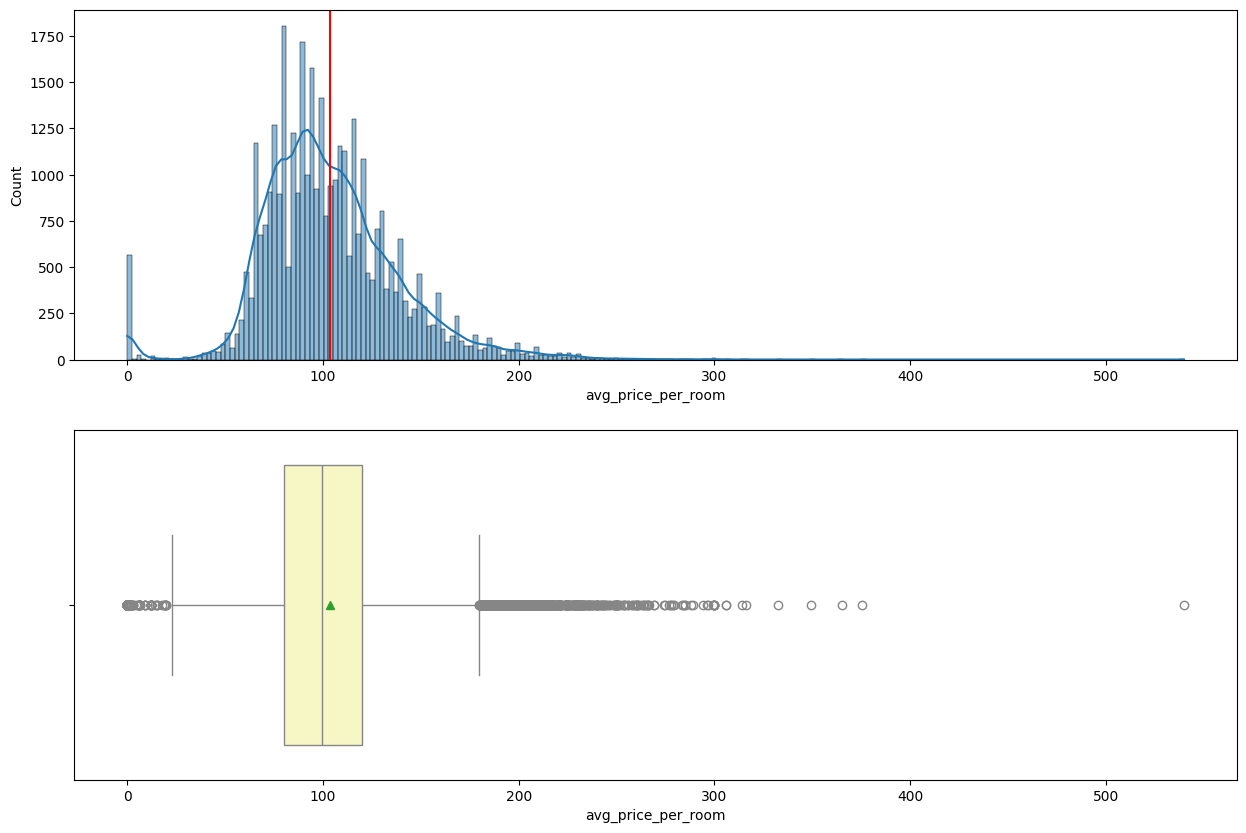

In [ ]:
plot_histogram_countplot_boxplot("avg_price_per_room", histplot=True)

The distribution showing average price per room follows a normal distribution with the interquantile range with average price being \$103 per room. \
Rooms costing less than \$20 and over \$200 seem to be outliers are the count is very less which does not seem to affect the normality of the distribution

#### no_of_special_requests

<Axes: xlabel='no_of_special_requests', ylabel='count'>

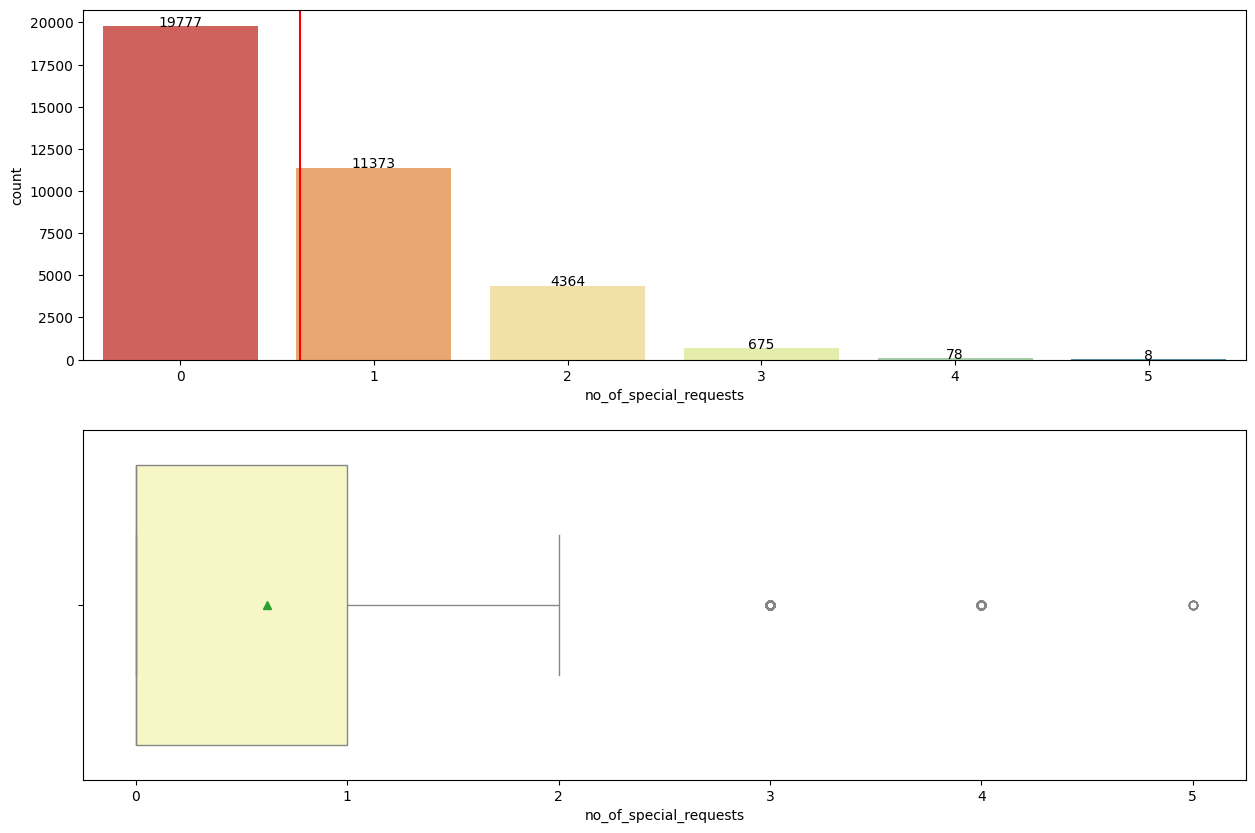

In [ ]:
plot_histogram_countplot_boxplot("no_of_special_requests")

19777 bookings did not have any special requests. \
However 11373 bookings has 1 special requests and 4364 bookings has 2 special requests. \
Bookings having more than 3 special requests are being considered as outliers since comparatively there are not many special requests

#### booking_status : **What percentage of bookings are canceled?**

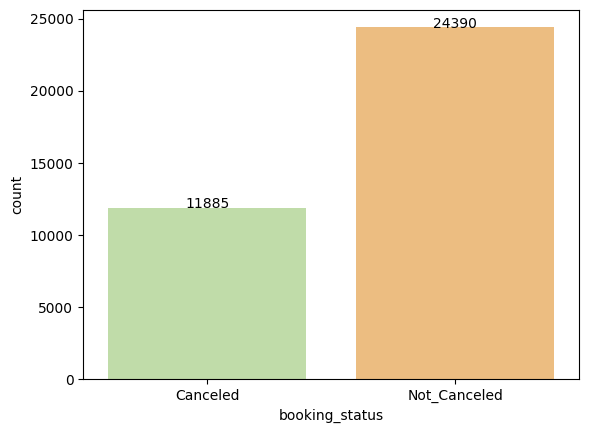

In [ ]:
plot_countplot("booking_status")

24390 bookings(**67%**) were not cancelled as compared to 11885(**33%**) bookings which were cancelled. \
Not cancelled bookings are still larger than the cancelled bookings however the proportions are still very close.

## Bivariate Analysis

### Bivariate analysis between numerical variables

The best way to see the comparison between two or more numerical variables is a heatmap. The following heatmap shows the correlation between the numerical variables

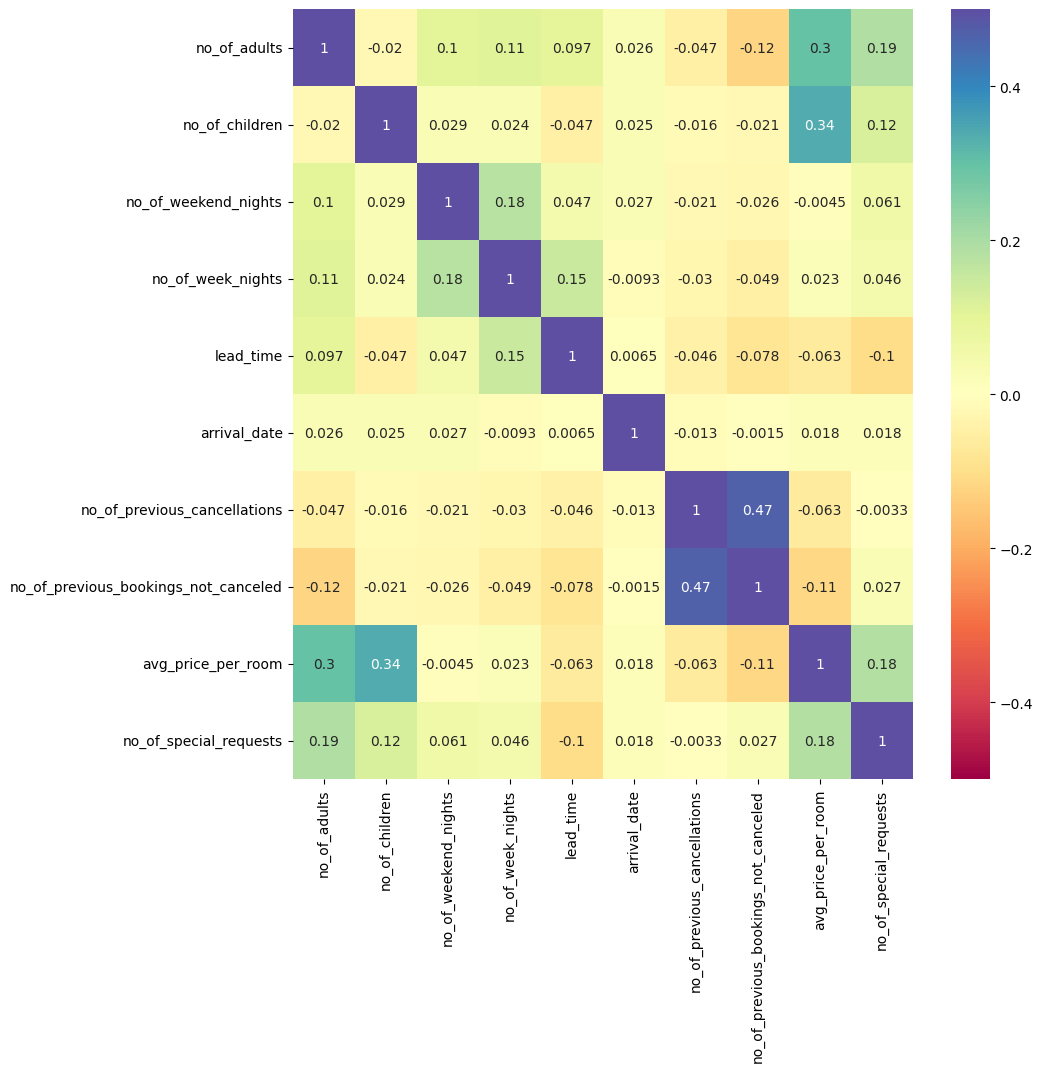

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Spectral", vmin=-0.5, vmax=0.5);
plt.show()

The Correlation among the Numerical Variables is very less but there seems to be some kind of correlation among **no_of_adults vs avg_price_per_room** and **no_of_children vs avg_price_per_room**

#### no_of_adults vs avg_price_per_room

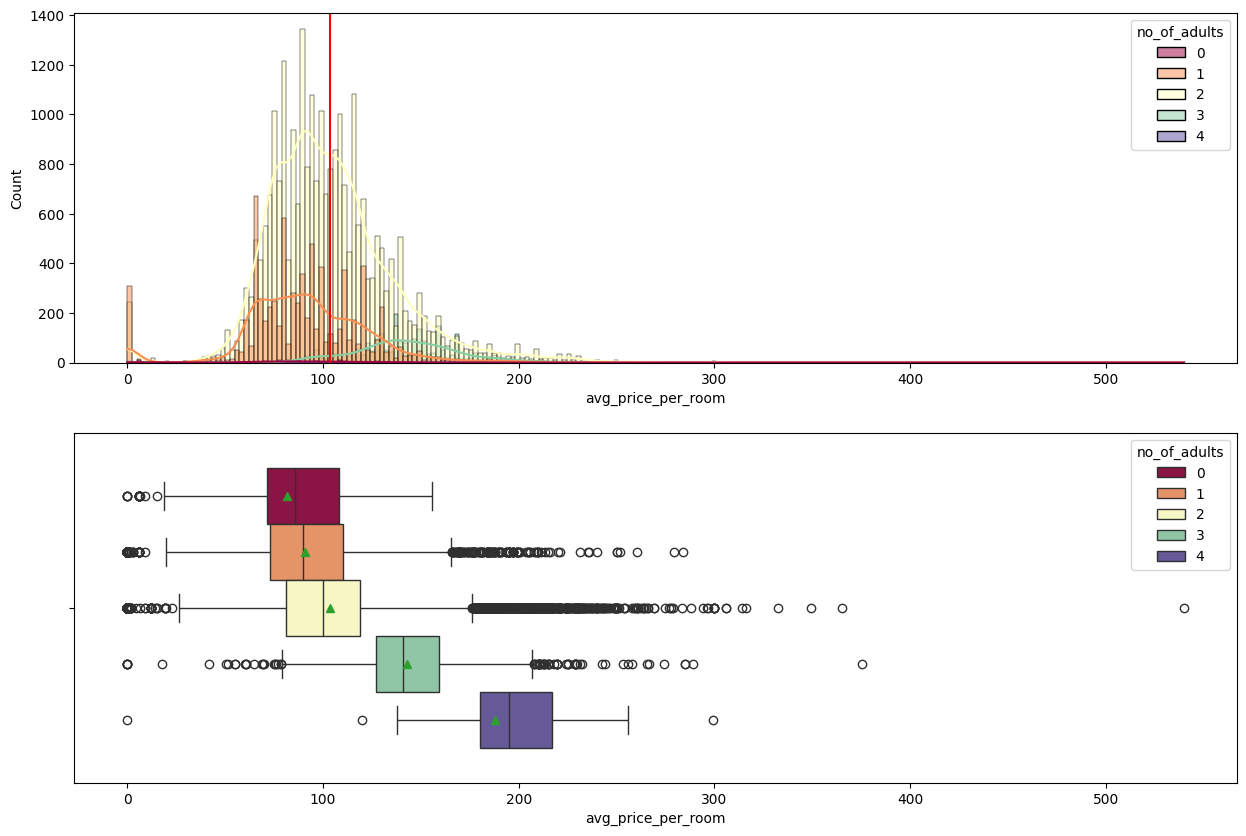

In [ ]:
plot_histogram_countplot_boxplot(col_name="avg_price_per_room", hue="no_of_adults", histplot=True);

From the graph above, it can be seen that bookings with more adults had an higher average than the bookings with less number of adults. \
The price per room for 0, 1 and 2 adults don't differ much, however bookings with 2 adults tend to have more outliers

#### no_of_children vs avg_price_per_room

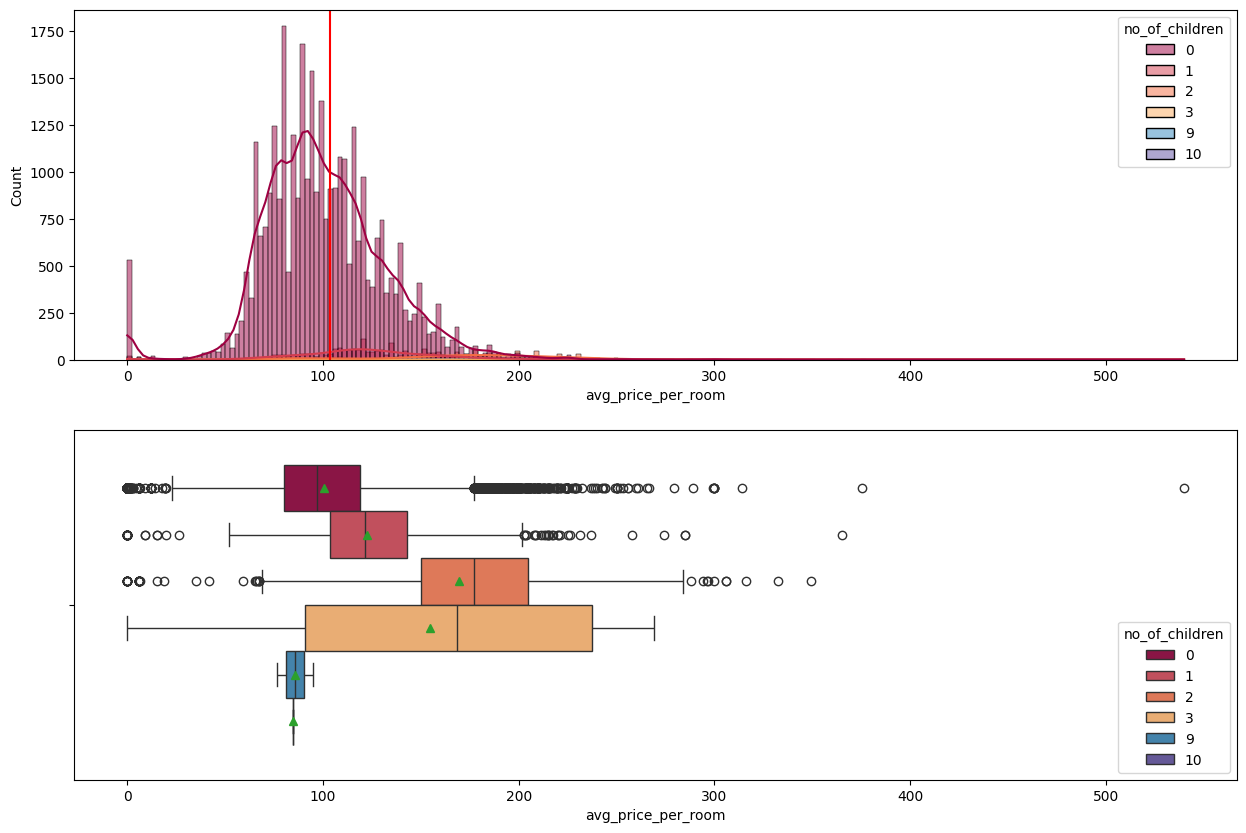

In [ ]:
plot_histogram_countplot_boxplot(col_name="avg_price_per_room", hue="no_of_children", histplot=True);

For children, the price range varies alot. Bookings with 0 and 1 children do not have much variations. However Bookings with 2 and 3 children have an increased average price.
The trend decreases when there are bigger groups of 9 and 10 children implying that these bookings might been given group discounts

As seen above, the correlation, though the highest, dont show any significant relationships among the variables

### Bivariate analysis between categorical variables

#### no_of_adults vs booking status

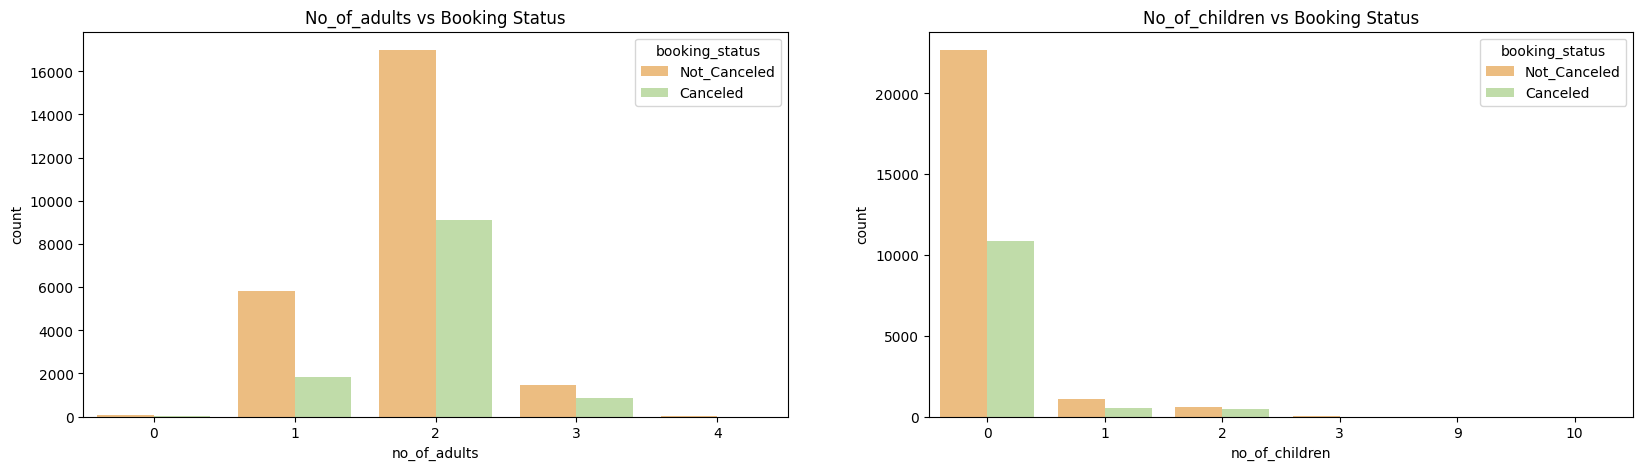

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1);
plt.title("No_of_adults vs Booking Status");
plot_countplot(col_name="no_of_adults", hue="booking_status");

plt.subplot(1,2,2);
plt.title("No_of_children vs Booking Status");
plot_countplot(col_name="no_of_children", hue="booking_status");

The distribution for adults and children is the same irrespective of the booking status

#### no_of_week_nights vs booking_status & no_of_weekend_nights vs booking_status

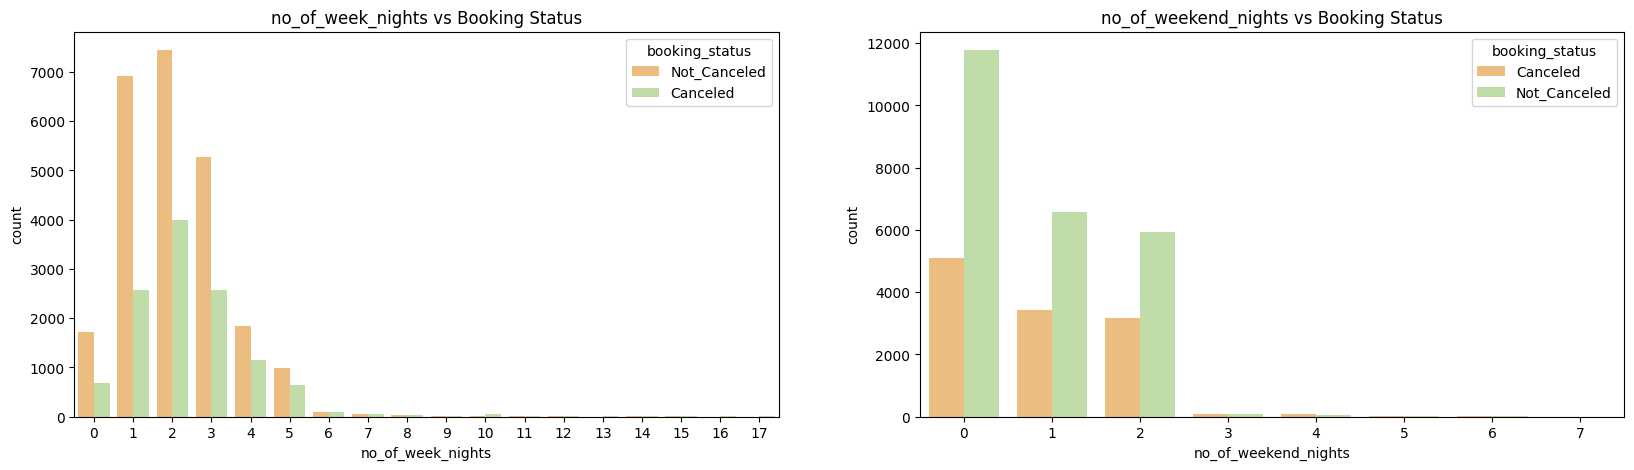

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1);
plt.title("no_of_week_nights vs Booking Status");
plot_countplot(col_name="no_of_week_nights", hue="booking_status");

plt.subplot(1,2,2);
plt.title("no_of_weekend_nights vs Booking Status");
plot_countplot(col_name="no_of_weekend_nights", hue="booking_status");

Not Cancelled bookings are still higher in proportion as compared to cancelled bookings but this behaviour is not noticed in the outliers.

Among outliers, the proportion is almost equal.

#### arrival_date, arrival_year vs booking_status

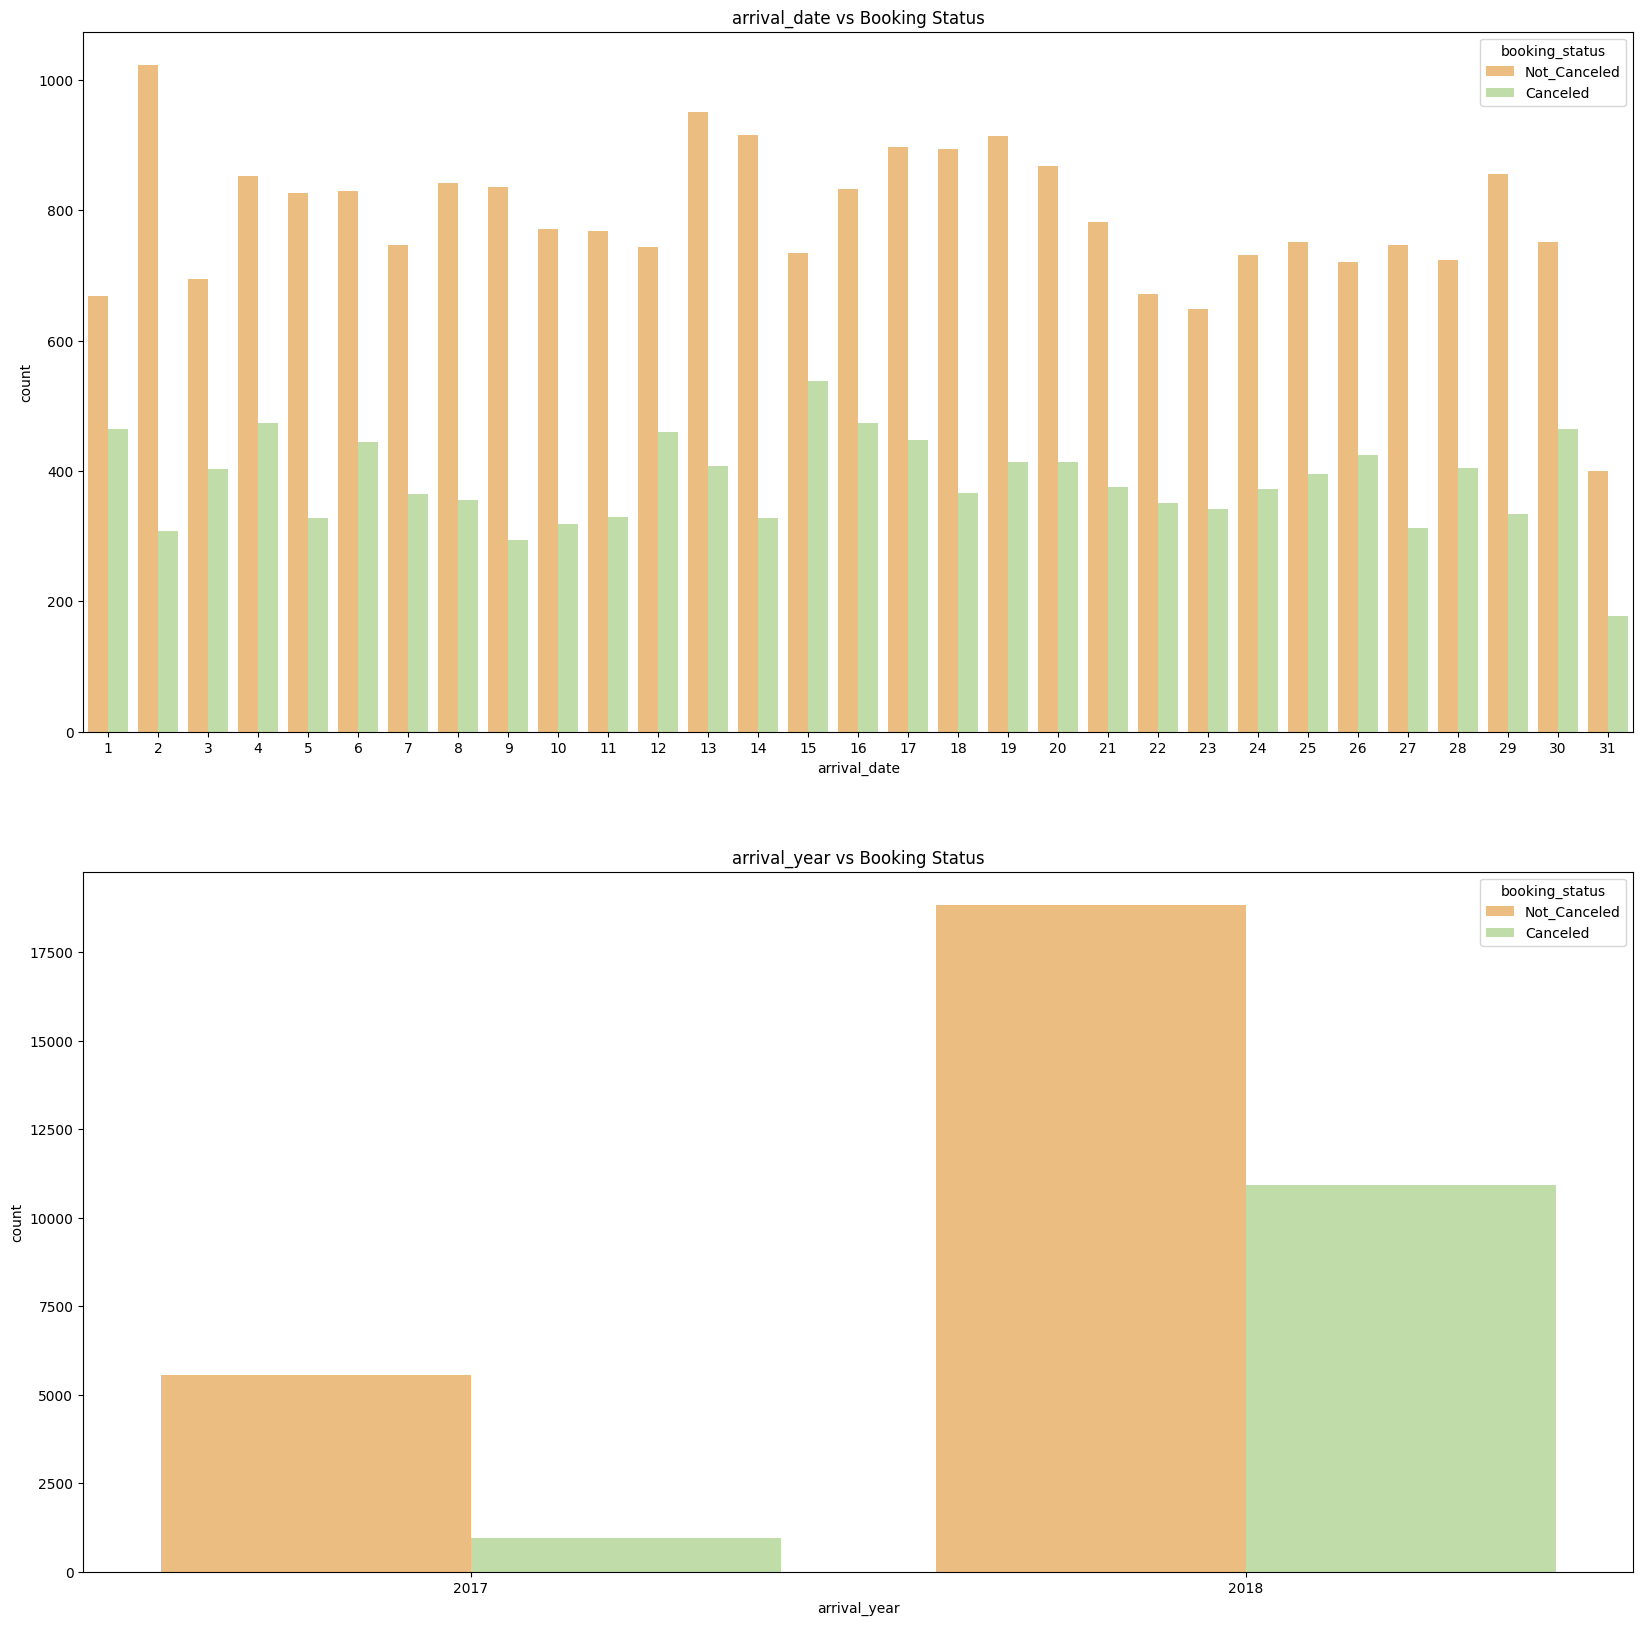

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1);
plt.title("arrival_date vs Booking Status");
plot_countplot(col_name="arrival_date", hue="booking_status");

plt.subplot(2,1,2);
plt.title("arrival_year vs Booking Status");
plot_countplot(col_name="arrival_year", hue="booking_status");

Booking status distribution is the same across all the three variables. However from the above graphs, we can understand the following:
1. Middle of the month has most likelihood of being uncertain whether the booking would be cancelled or not.
2. There were less cancellation proportion wise in 2017 than in 2018

#### arrival_month vs booking_status : **What are the busiest months in the hotel?**

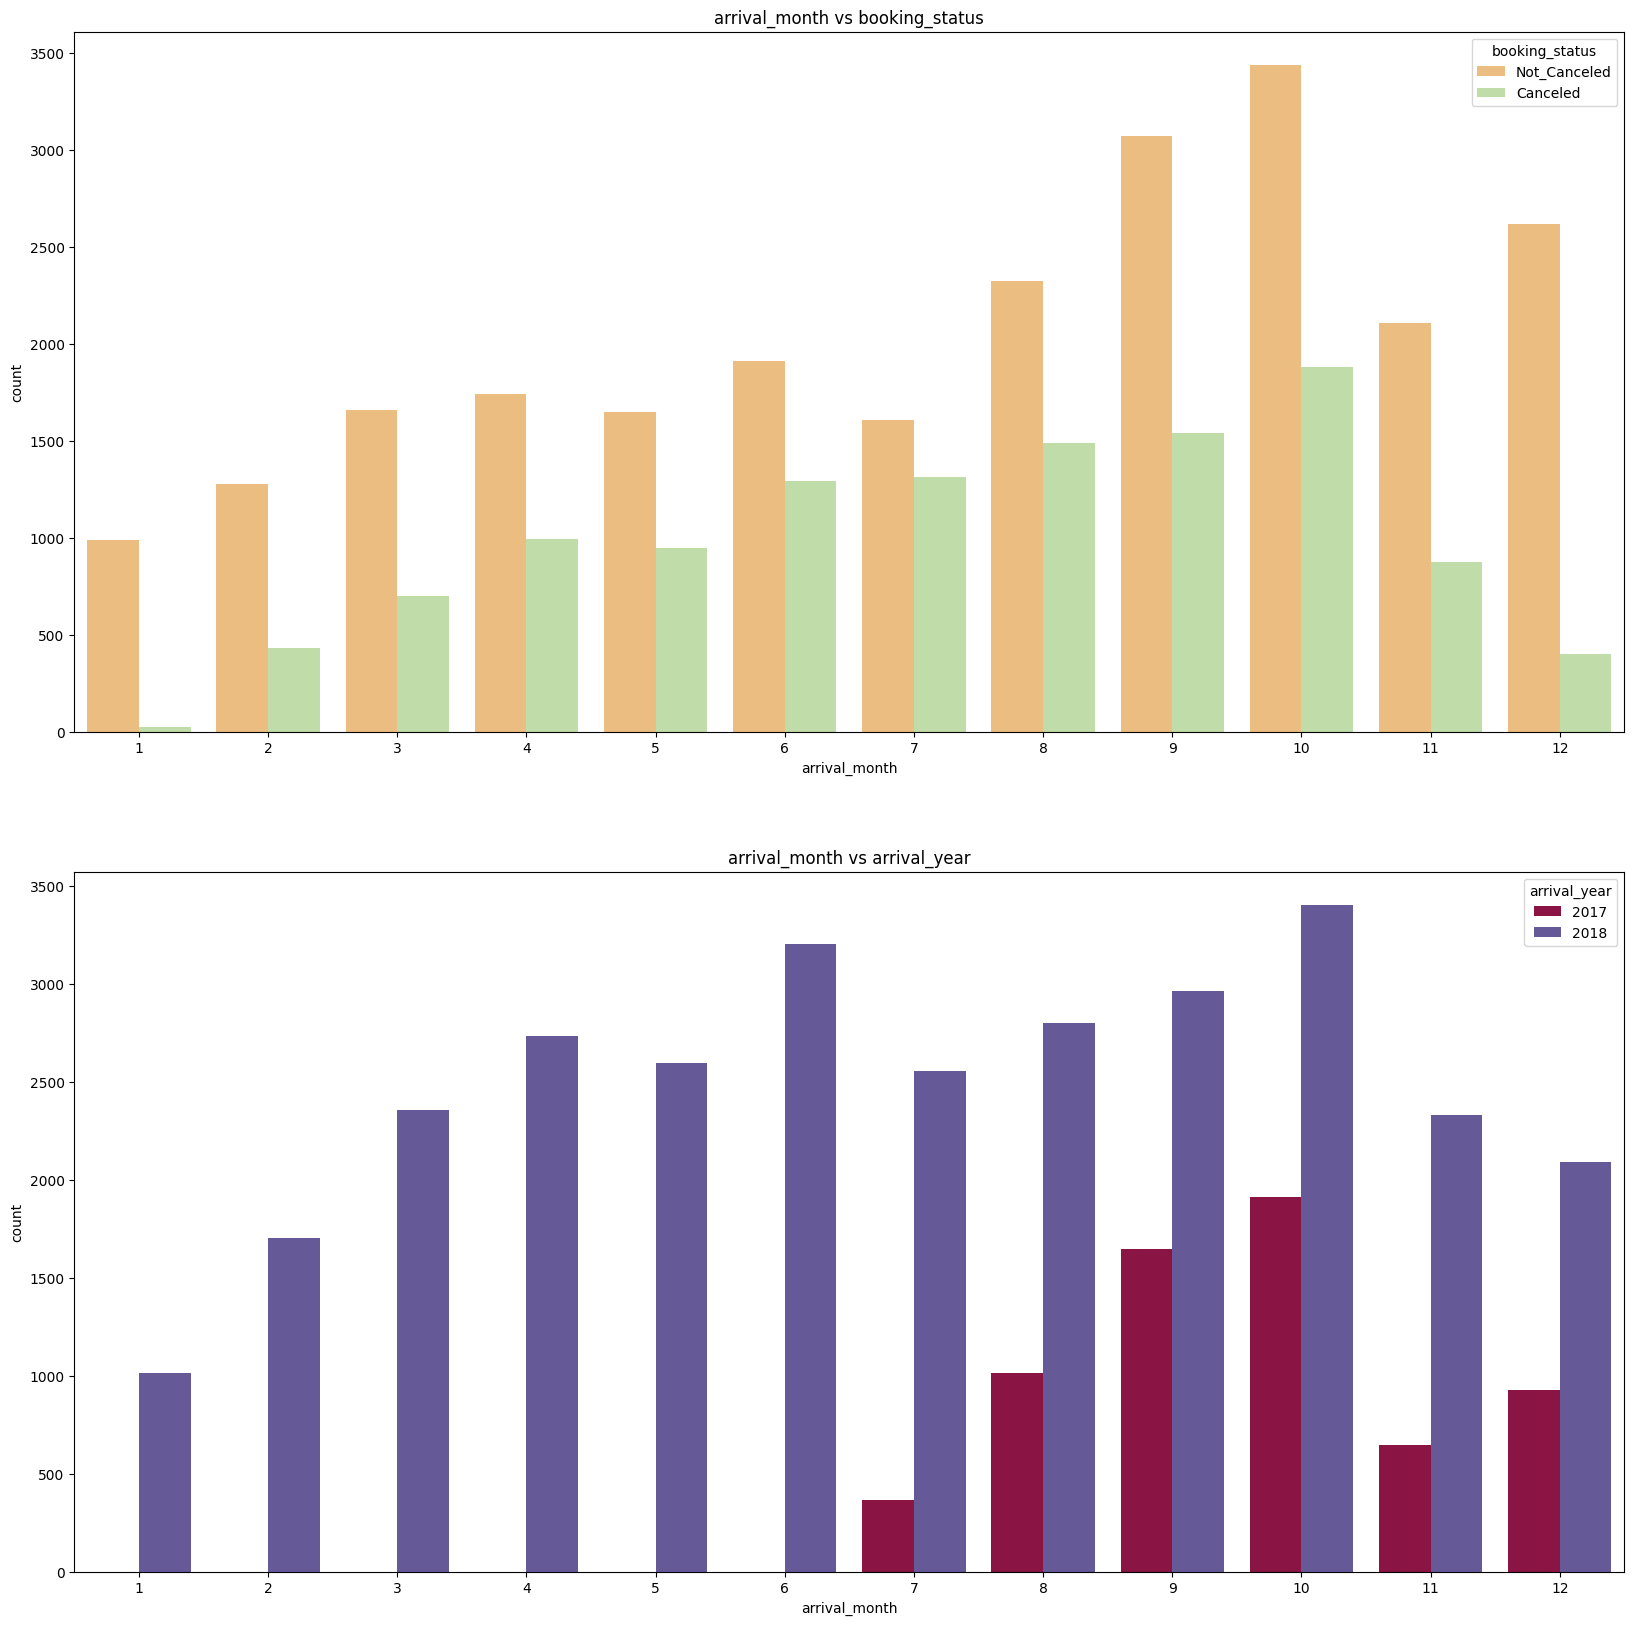

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,1,1);
plot_countplot(col_name="arrival_month", hue="booking_status");
plt.title("arrival_month vs booking_status");

plt.subplot(2,1,2);
plot_countplot(col_name="arrival_month", hue="arrival_year");
plt.title("arrival_month vs arrival_year");

October is the busiest month in both the years followed by September and August

#### market_segment_type vs avg_price_per_room

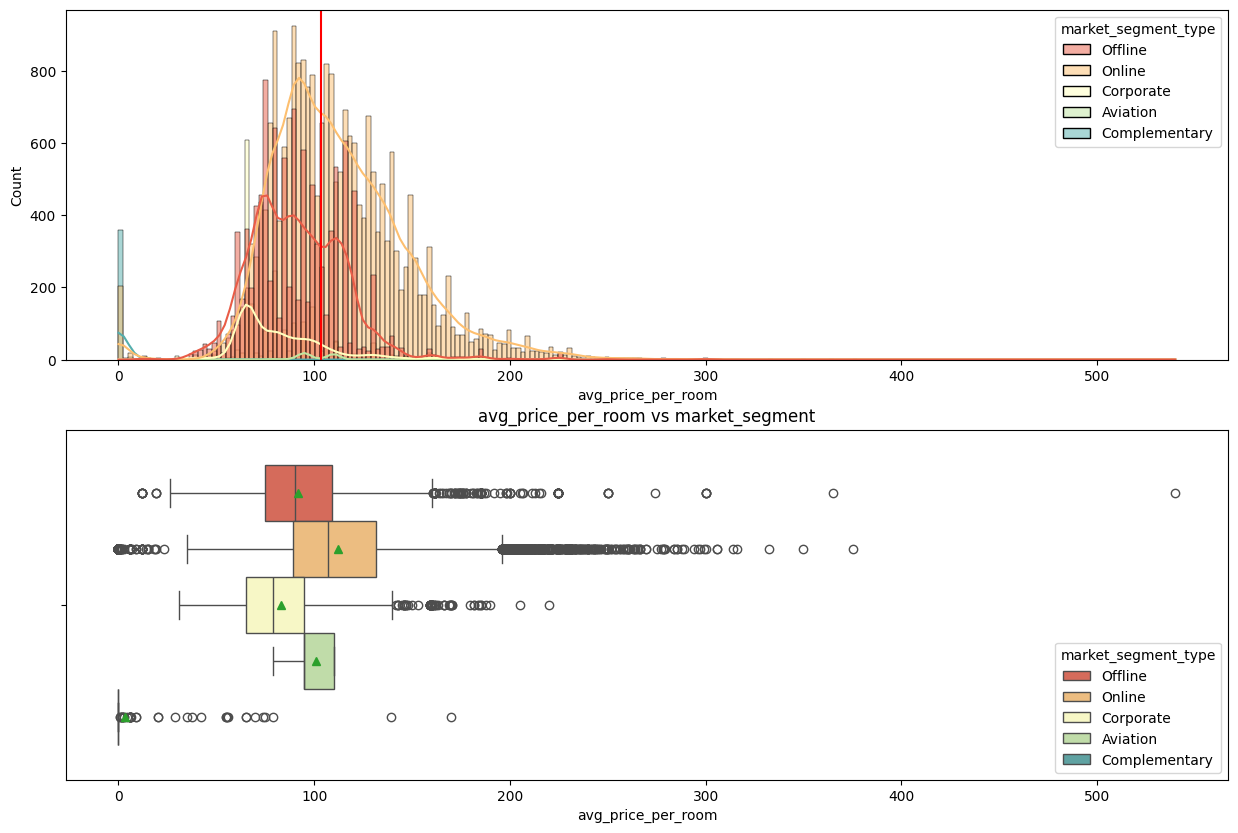

In [ ]:
plot_histogram_countplot_boxplot(col_name="avg_price_per_room", hue="market_segment_type", histplot=True);
plt.title("avg_price_per_room vs market_segment");

The price range for online is higher than the price range for offline mode which might indicate that the hotel offers more discounts for its offline customers \

Corporate and Aviation would tend to have lower price per room since the companies usually have tie up with the hotel. \
Aviation also does not have much of outliers indicating less flexibility in their pricing

#### **What are the differences in room prices in different market segments?**

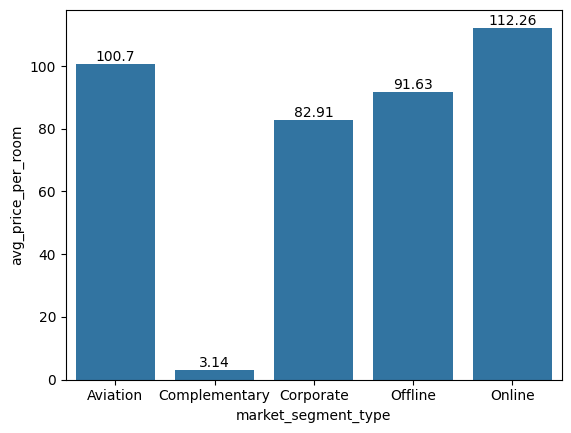

In [ ]:
grouped_data = data.groupby("market_segment_type")["avg_price_per_room"].mean().reset_index()
sns.barplot(grouped_data, x="market_segment_type", y="avg_price_per_room");
for i, row in grouped_data.iterrows():
    plt.text(i, row['avg_price_per_room'], round(row['avg_price_per_room'], 2), ha='center', va='bottom')

#### market_segment_type vs booking status : **Which market segment do most of the guests come from?**

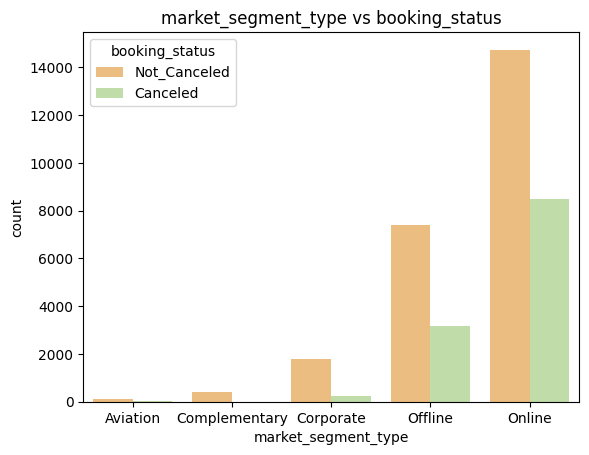

In [ ]:
plot_countplot(col_name="market_segment_type", hue="booking_status");
plt.title("market_segment_type vs booking_status");

As seen previously, offline market tends to get higher discounts however Online market is the market that prefers the hotel the most.
The proportion between cancellation vs non-cancellation is less in Online in comparison to Offline suggesting that Offline customers do not tend to cancel their bookings as much the hotel's online customers.

As seen in the above graph, Aviation and Corporate bookings does not have many cancellation as these companies have a tie with the hotel which would lead to less cancellation

Complementary bookings should ideally not have any cancellations which is reflected here

**Most of the Customers come through their online mode**

#### repeated_guest vs booking_cancelled : **What percentage of repeating guests cancel?**

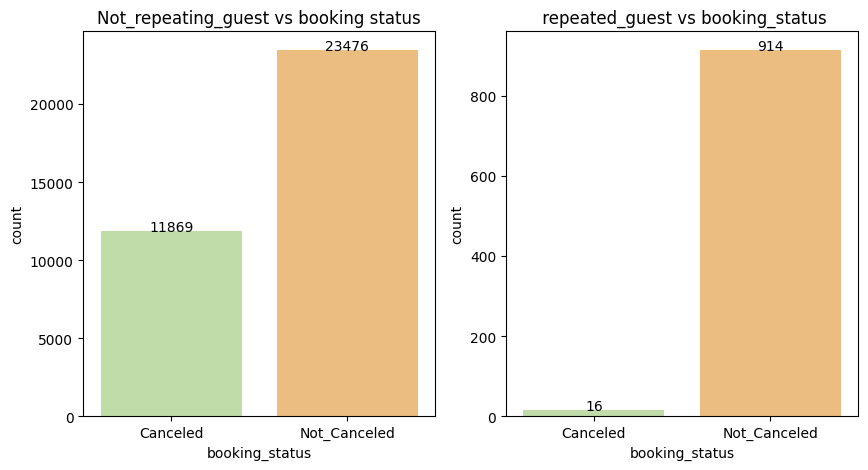

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1);
plot_countplot(data=data[data["repeated_guest"]==0],
               col_name="booking_status")
plt.title("Not_repeating_guest vs booking status");

plt.subplot(1,2,2);
plot_countplot(data=data[data["repeated_guest"]==1],
               col_name="booking_status")
plt.title(" repeated_guest vs booking_status");

Among the Repeated guest, only 1 % of the guest cancel their booking

#### no_of_special_requests vs booking_status
#### **Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

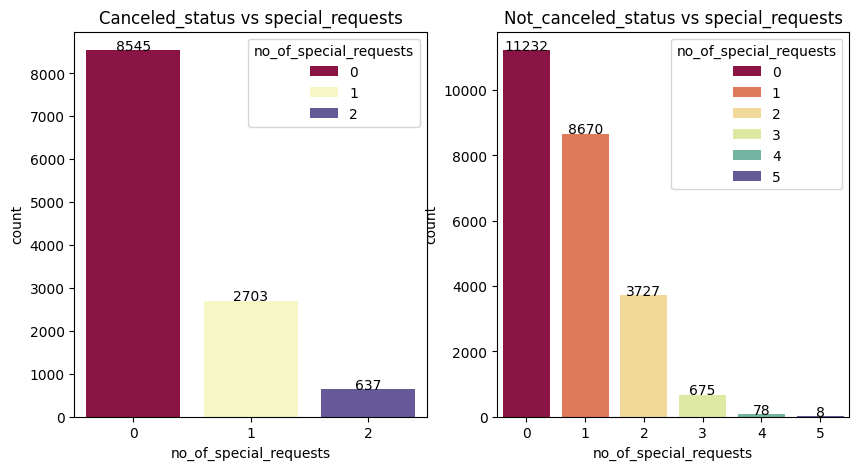

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1);
plot_countplot(data=data[data["booking_status"]=='Canceled'],
               col_name="no_of_special_requests")
plt.title("Canceled_status vs special_requests");

plt.subplot(1,2,2);
plot_countplot(data=data[data["booking_status"]=='Not_Canceled'],
               col_name="no_of_special_requests")
plt.title("Not_canceled_status vs special_requests");

Approx 30% of the canceled bookings had 1 or more special request. Hence we can say that special requests do not impact the cancelation factor by much

# Data Preprocessing

### Outlier Detection and Treatment

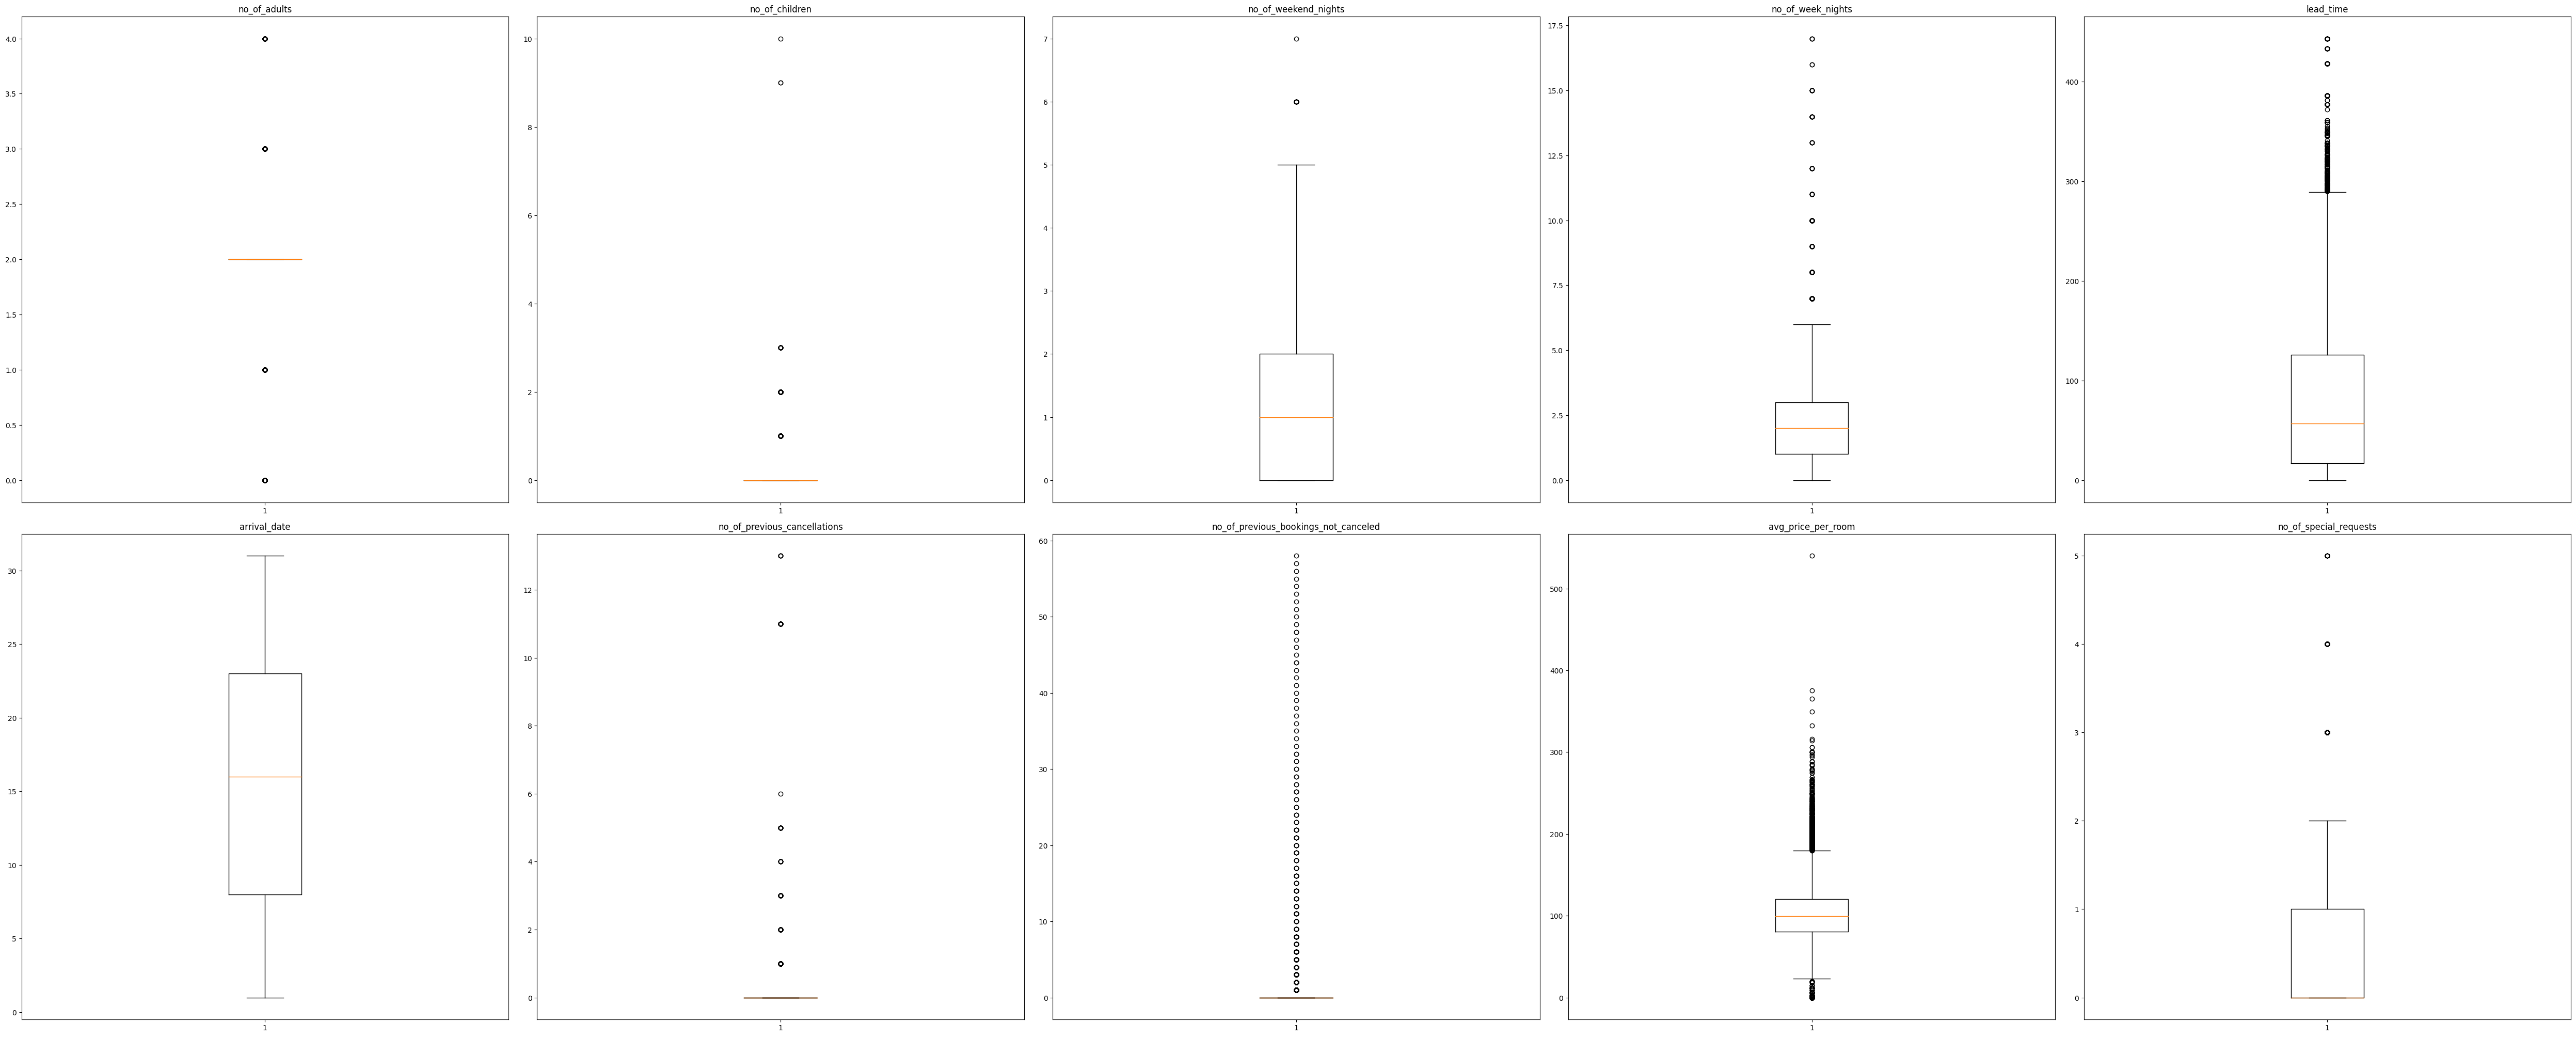

In [ ]:
plt.figure(figsize=(50, 50))
col_list = data.select_dtypes(include=["number"]).columns

for i, variable in enumerate(col_list):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

There are quite a few outliers in the data. \
However, we will not treat them as they are proper values

### Encoding Categorical Variables

Categorical Variables are encoded using One Hot Encoding

In [ ]:
categorical_columns = ['type_of_meal_plan','room_type_reserved','arrival_year','market_segment_type']
data_with_dummies = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype = int)

In [ ]:
data.select_dtypes(include=["object"]).columns

Index(['Booking_ID', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'booking_status'],
      dtype='object')

In [ ]:
data_with_dummies.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,10,2,0,0,0,65.00,0,Not_Canceled,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,11,6,0,0,0,106.68,1,Not_Canceled,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,INN00003,1,0,2,1,0,1,2,28,0,0,0,60.00,0,Canceled,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,INN00004,2,0,0,2,0,211,5,20,0,0,0,100.00,0,Canceled,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,INN00005,2,0,1,1,0,48,4,11,0,0,0,94.50,0,Canceled,0,0,1,0,0,0,0,0,0,1,0,0,0,1


required_car_parking_space, arrival_month, repeated_guest are already encoded columns hence don't require one hot encoding

### Data Scaling

In [ ]:
numeric_column = data.drop(columns=["Booking_ID","booking_status","required_car_parking_space", "arrival_month", "repeated_guest"]).select_dtypes(include=["number"]).columns

In [ ]:
scaler = StandardScaler()

scaler.fit(data_with_dummies[numeric_column])
data_with_dummies[numeric_column] = scaler.transform(data_with_dummies[numeric_column])

In [ ]:
data_with_dummies.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,arrival_year_2018,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,0.298893,-0.26147,0.217401,-0.144803,0,1.614896,10,-1.555662,0,-0.063393,-0.087456,-1.095033,-0.78814,Not_Canceled,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,INN00002,0.298893,-0.26147,1.365993,0.563972,0,-0.933701,11,-1.098013,0,-0.063393,-0.087456,0.092806,0.48376,Not_Canceled,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,INN00003,-1.628975,-0.26147,1.365993,-0.853578,0,-0.980250,2,1.419055,0,-0.063393,-0.087456,-1.237528,-0.78814,Canceled,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,INN00004,0.298893,-0.26147,-0.931190,-0.144803,0,1.463610,5,0.503757,0,-0.063393,-0.087456,-0.097567,-0.78814,Canceled,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,INN00005,0.298893,-0.26147,0.217401,-0.853578,0,-0.433291,4,-0.525952,0,-0.063393,-0.087456,-0.254312,-0.78814,Canceled,0,0,1,0,0,0,0,0,0,1,0,0,0,1


### Separating Data into Feature Variable and Target Variable

In [ ]:
X = data_with_dummies.drop(columns=["Booking_ID","booking_status"])
y = data["booking_status"].replace({"Canceled": 1, "Not_Canceled":0})

### Train, Test, Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0    0.672377
1    0.327623
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672333
1    0.327667
Name: proportion, dtype: float64


# Model Building

## Model Evaluation
### **Model evaluation criterion**

Model can make wrong predictions as:

Predicting whether a booking will not get cancelled but in reality, the booking will get cancelled (FN) \
Predicting whether a booking will get cancelled but in reality, the booking will not get cancelled (FP) \
Which case is more important?


If we predict the booking will not get cancelled but in reality, the booking is cancelled, then the hotel will lose on more potential cuustomers since the reservations will be done and replacement booking could not be found in time.

If we predict that a booking will get cancelled but in reality, it does not cancelled, then the hotel would not be that affected but there might be loss in customer statisfaction.

Hence, INN hotel would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target, model_type=None, lr_threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables depending upon model type
    if model_type == "lr":
      pred_temp = (model.predict_proba(predictors))[:, 1] > lr_threshold
      pred = np.round(pred_temp)
    else:
      pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target, model_type=None, lr_threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    if model_type == "lr":
      pred_temp = (model.predict_proba(predictors))[:, 1] > lr_threshold
      y_pred = np.round(pred_temp)
    else:
      y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Logistic Regression**

In [ ]:
lr_model = LogisticRegression(solver="newton-cg", random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

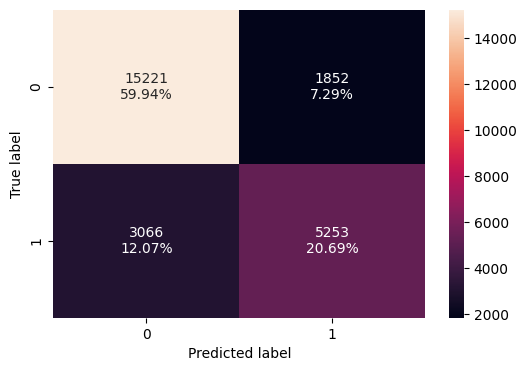

In [ ]:
confusion_matrix_sklearn(lr_model, X_train, y_train, model_type="lr")

In [ ]:
# checking model performance for this model
lr_model_train_perf = model_performance_classification_sklearn(lr_model, X_train, y_train, model_type="lr")
print("Training performance:")
lr_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806317,0.631446,0.739338,0.681146


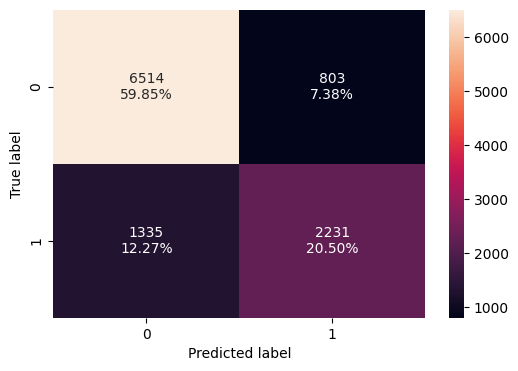

In [ ]:
confusion_matrix_sklearn(lr_model, X_test, y_test, model_type="lr")

In [ ]:
# checking model performance for this model
lr_model_test_perf = model_performance_classification_sklearn(lr_model, X_test, y_test, model_type="lr")
print("Test performance:")
lr_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803547,0.625631,0.735333,0.676061


The Recall for training and Test dataset is 0.63 which is a low recall. However the metrics for both training as well as test dataset is the same range, hence there is no overfitting.

### **Model Improvement**

* Let's see if the recall score can be improved further by changing the classification threshold.
* We'll try to arrive at the optimal threshold by checking two curves:
    - ROC curve
    - Precision-Recall curve

#### ROC Curve

This curve plots the False Positive Rate against the True Positive Rate and lets us know how much of the classification is done correctly within the classes

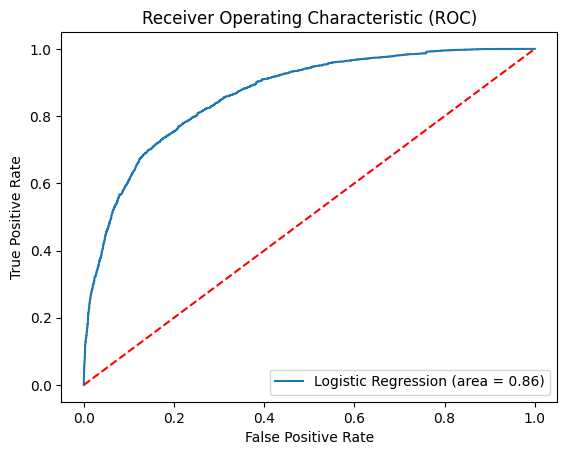

In [ ]:
logit_roc_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32978234732762624


Training performance after roc_auc_threshold:


,Accuracy,Recall,Precision,F1
0,0.783554,0.768001,0.641788,0.699245


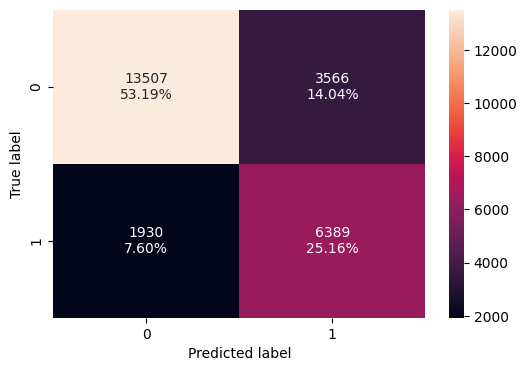

In [ ]:
confusion_matrix_sklearn(lr_model, X_train, y_train, model_type="lr",lr_threshold=optimal_threshold_auc_roc)
lr_model_train_perf_auc = model_performance_classification_sklearn(lr_model, X_train, y_train, model_type="lr", lr_threshold=optimal_threshold_auc_roc)
print("Training performance after roc_auc_threshold:")
lr_model_train_perf_auc

Test performance after roc_auc_threshold:


,Accuracy,Recall,Precision,F1
0,0.777175,0.766966,0.631786,0.692844


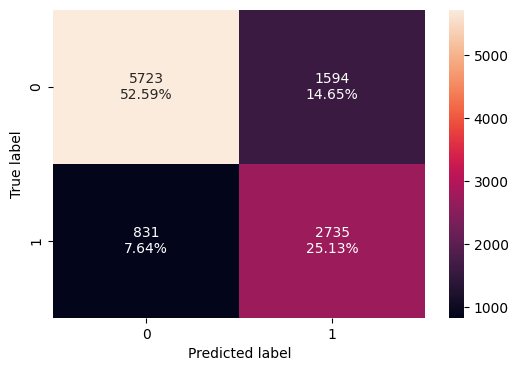

In [ ]:
confusion_matrix_sklearn(lr_model, X_test, y_test, model_type="lr",lr_threshold=optimal_threshold_auc_roc)
lr_model_test_perf_auc = model_performance_classification_sklearn(lr_model, X_test, y_test, model_type="lr", lr_threshold=optimal_threshold_auc_roc)
print("Test performance after roc_auc_threshold:")
lr_model_test_perf_auc

The Recall has improved from 0.63 to 0.74 with precision slightly reducing. this tradeoff is acceptable as our recall has improved

#### Precision Recall Curve

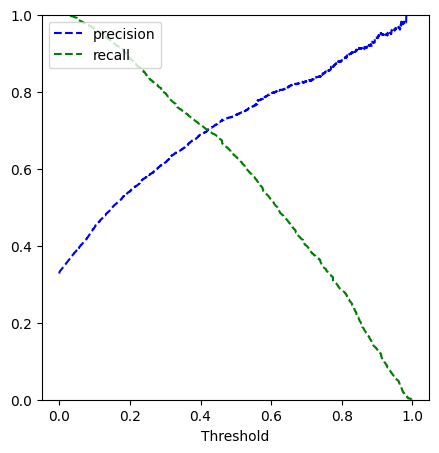

In [ ]:
y_scores = lr_model.predict_proba(X_train)[:, 1]
prec, rec, thres = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_thres(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(5, 5))
plot_prec_recall_vs_thres(prec, rec, thres)
plt.show()

In [ ]:
# the optimal threshold will be the point where precision and recall are the same
# we first find the index where the precision and recall are the same
# then we find the threshold for the corresponding index
idx = np.where((rec == prec) == True)[0][0]
optimal_threshold_prec_rec = thres[idx]
print(optimal_threshold_prec_rec)

0.4203098058372004


Training performance after precision_recall_threshold:


,Accuracy,Recall,Precision,F1
0,0.803836,0.700565,0.700649,0.700607


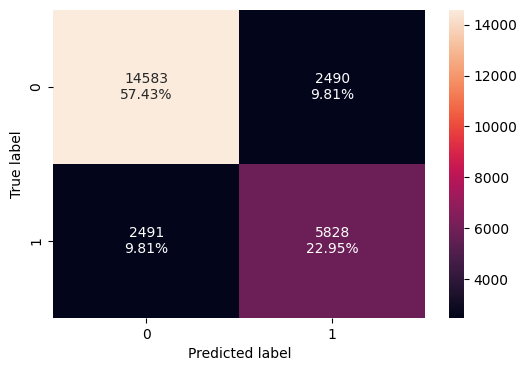

In [ ]:
confusion_matrix_sklearn(lr_model, X_train, y_train, model_type="lr",lr_threshold=optimal_threshold_prec_rec)
lr_model_train_perf_prec = model_performance_classification_sklearn(lr_model, X_train, y_train, model_type="lr", lr_threshold=optimal_threshold_prec_rec)
print("Training performance after precision_recall_threshold:")
lr_model_train_perf_prec

Test performance after precision_recall_threshold:


,Accuracy,Recall,Precision,F1
0,0.797666,0.695177,0.689761,0.692458


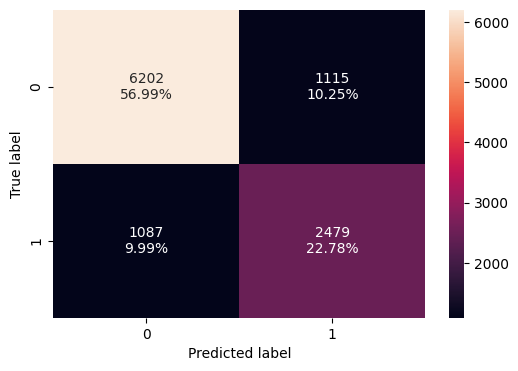

In [ ]:
confusion_matrix_sklearn(lr_model, X_test, y_test, model_type="lr",lr_threshold=optimal_threshold_prec_rec)
lr_model_test_perf_prec = model_performance_classification_sklearn(lr_model, X_test, y_test, model_type="lr", lr_threshold=optimal_threshold_prec_rec)
print("Test performance after precision_recall_threshold:")
lr_model_test_perf_prec

The Recall has improved from 0.63 to 0.7 with precision slightly reducing. This tradeoff is acceptable as our recall has improved. However the AUC curve threshold gave better results

## **K-Nearest Neighbours**

K-Nearest Neighbours model classifies points based on the proximity of the classes next to it. It is known as a lazy learner.
**k** is the parameter by which the model can decide the class on the basis of number of points closer to the data point.

We have to experiment with different k values to find the optimal k-value

### k=3

In [ ]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

,Accuracy,Recall,Precision,F1
0,0.915997,0.853107,0.886239,0.869358


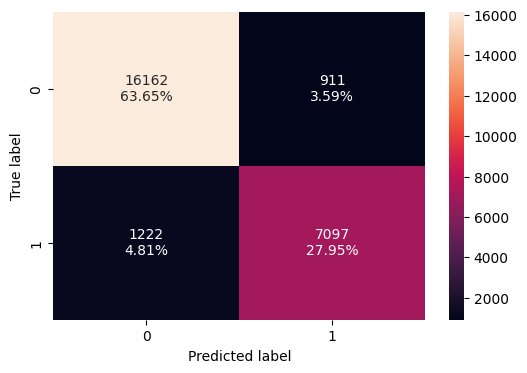

In [ ]:
confusion_matrix_sklearn(knn_3, X_train, y_train)
knn_perf_train_3 = model_performance_classification_sklearn(knn_3, X_train, y_train)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.842231,0.734997,0.772473,0.753269


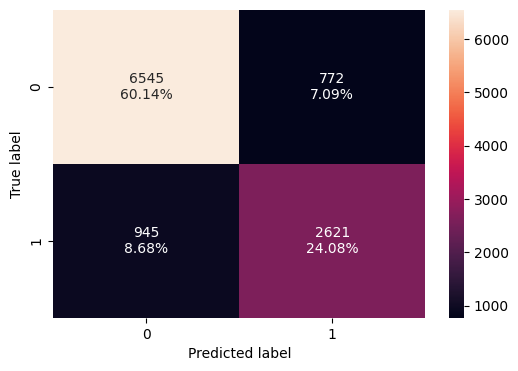

In [ ]:
confusion_matrix_sklearn(knn_3, X_test, y_test)
knn_perf_test_3 = model_performance_classification_sklearn(knn_3, X_test, y_test)
knn_perf_test_3

The Recall and Precision have improved significantly from Logistic Regression. However the Recall and Precision for Train is higher than the test data. There is some kind of over fitting happening when k=3.

### Let's try different K values to find the optimal k-value


In [ ]:
# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

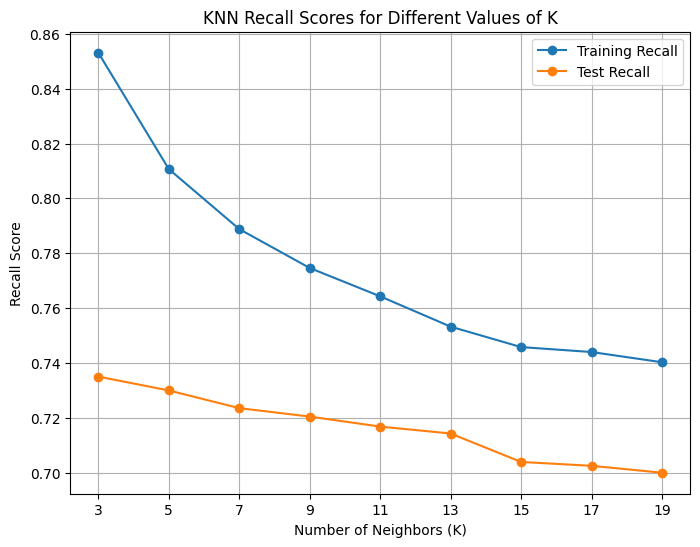

In [ ]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

* The recall scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.

* As the value of k increases beyond 3, the recall scores tend to decrease for both training and test sets. This indicates a potential risk of the model not being able to identify the underlying patterns in the data.

* Therefore, based on the provided recall scores, k=3 appears to be the most suitable choice for balancing model performance between capturing positive instances effectively and generalizing well to new data.



## **Naive Bayes Classifier**

Naive Bayes classification is a probabilistic algorithm based on Bayes' theorem, which assumes that the features are conditionally independent given the class label. It calculates the probability of each class for a given input and predicts the class with the highest likelihood

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

,Accuracy,Recall,Precision,F1
0,0.40942,0.964178,0.353053,0.51685


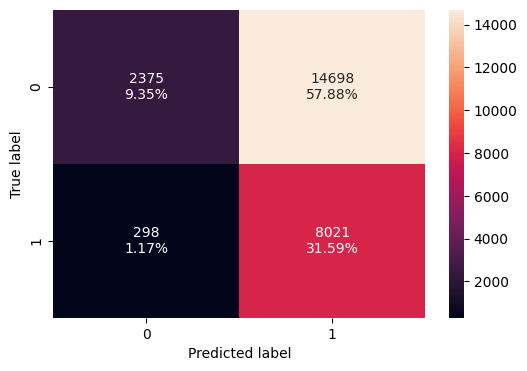

In [ ]:
confusion_matrix_sklearn(nb, X_train, y_train)
nb_perf_train = model_performance_classification_sklearn(nb, X_train, y_train)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.407333,0.962984,0.352133,0.515693


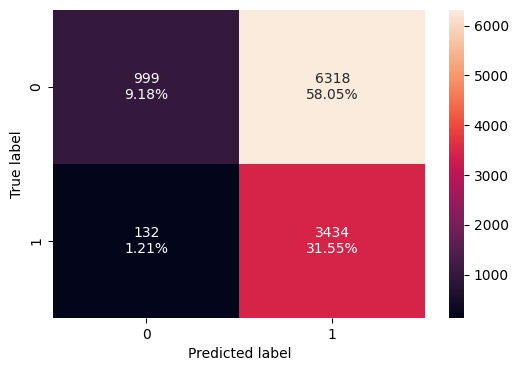

In [ ]:
confusion_matrix_sklearn(nb, X_test, y_test)
nb_perf_test = model_performance_classification_sklearn(nb, X_test, y_test)
nb_perf_test

Recall is exceptionally high, which means the model would predict correctly if booking won't be cancelled. The model tends to predict majority of the data points as not cancelled and it is not able to anticipate if the booking would be cancelled.

## **Support Vector Machines**

Support Vector Machines (SVM) are supervised learning models used for classification and regression tasks that work by finding the hyperplane that best separates data into classes with the largest margin.

### Support Vector Machine (Kernel = "linear")

In [ ]:
# fitting SVM model
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804427,0.614497,0.743997,0.673074


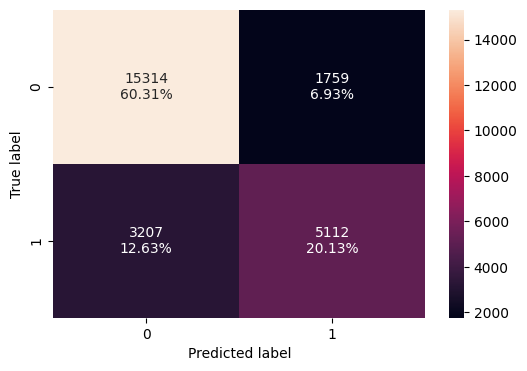

In [ ]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)
print("Training performance:")
model_lin_kern_train = model_performance_classification_sklearn(model=svm, predictors=X_train, target=y_train)
model_lin_kern_train

Test performance:


,Accuracy,Recall,Precision,F1
0,0.801709,0.608245,0.740273,0.667796


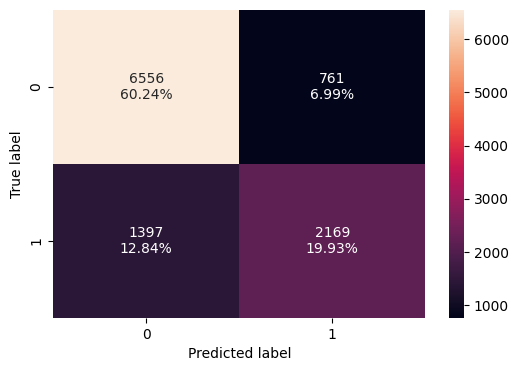

In [ ]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)
print("Test performance:")
model_lin_kern_test = model_performance_classification_sklearn(model=svm, predictors=X_test, target=y_test)
model_lin_kern_test

Recall is the lowest however precision is comparitively good. \
We can see any other configuration now to check if we can improve recall

### Support Vector Machine (Kernel = "Linear", C=2)

In [ ]:
svm.C

1.0

In [ ]:
svm_c2 = SVC(kernel='linear', C=2)
svm_c2.fit(X_train,y_train)

SVC(C=2, kernel='linear')

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804584,0.615338,0.743933,0.673553


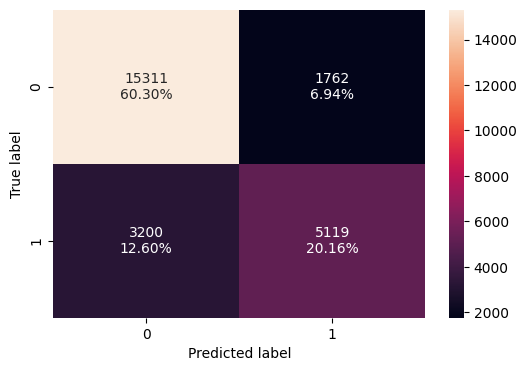

In [ ]:
confusion_matrix_sklearn(model=svm_c2,predictors= X_train, target=y_train)
print("Training performance:")
model_lin_kern_train_c2 = model_performance_classification_sklearn(model=svm_c2, predictors=X_train, target=y_train)
model_lin_kern_train_c2

Test performance:


,Accuracy,Recall,Precision,F1
0,0.801801,0.608525,0.740362,0.668001


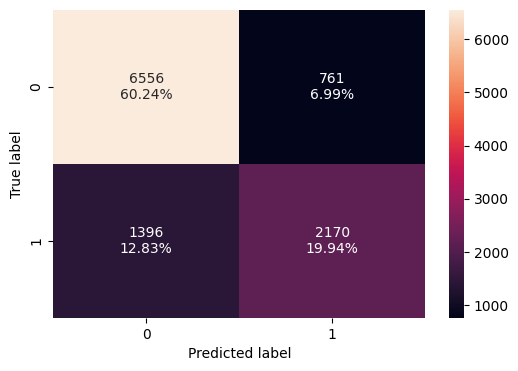

In [ ]:
confusion_matrix_sklearn(model=svm_c2,predictors= X_test, target=y_test)
print("Test performance:")
model_lin_kern_test_c2 = model_performance_classification_sklearn(model=svm_c2, predictors=X_test, target=y_test)
model_lin_kern_test_c2

By increasing the **C** parameter(regularization), there is no significant improvement in precision and recall

### Support Vector Machine (Kernel = "Linear", C=0.5)

In [ ]:
svm_c0_5 = SVC(kernel='linear', C=0.5)
svm_c0_5.fit(X_train,y_train)

SVC(C=0.5, kernel='linear')

Training performance:


,Accuracy,Recall,Precision,F1
0,0.804545,0.614257,0.744464,0.673121


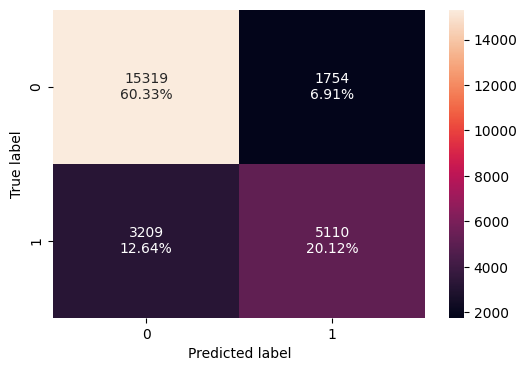

In [ ]:
confusion_matrix_sklearn(model=svm_c0_5,predictors= X_train, target=y_train)
print("Training performance:")
model_lin_kern_train_c0_5 = model_performance_classification_sklearn(model=svm_c0_5, predictors=X_train, target=y_train)
model_lin_kern_train_c0_5

Test performance:


,Accuracy,Recall,Precision,F1
0,0.802169,0.609366,0.74088,0.668718


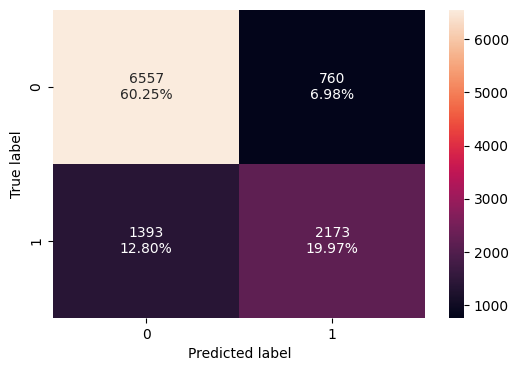

In [ ]:
confusion_matrix_sklearn(model=svm_c0_5,predictors= X_test, target=y_test)
print("Test performance:")
model_lin_kern_test_c0_5 = model_performance_classification_sklearn(model=svm_c0_5, predictors=X_test, target=y_test)
model_lin_kern_test_c0_5

By decreasing the C parameter(regularization), there is no significant improvement in precision and recall

### Support Vector Machine (Kernel = "RBF")

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)

SVC()

Training performance:


,Accuracy,Recall,Precision,F1
0,0.82656,0.639019,0.791425,0.707103


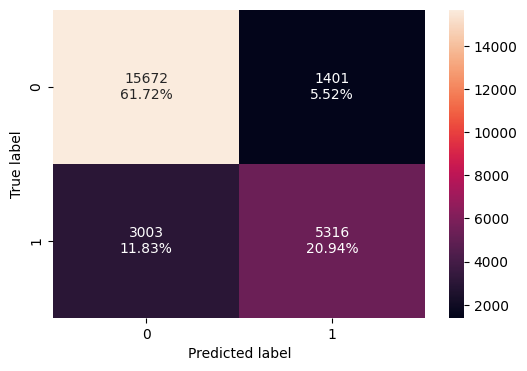

In [ ]:
confusion_matrix_sklearn(model=svm_rbf,predictors= X_train, target=y_train)
print("Training performance:")
model_rbf_kern_train = model_performance_classification_sklearn(model=svm_rbf, predictors=X_train, target=y_train)
model_rbf_kern_train

Test performance:


,Accuracy,Recall,Precision,F1
0,0.823854,0.627874,0.791446,0.700235


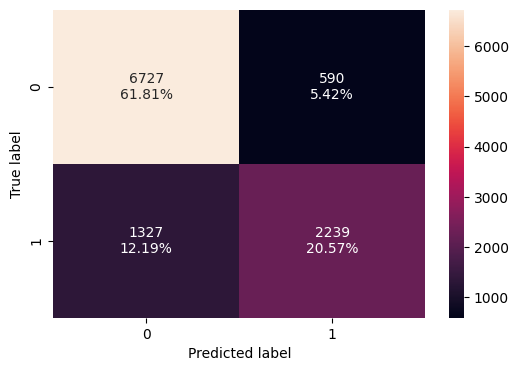

In [ ]:
confusion_matrix_sklearn(model=svm_rbf,predictors= X_test, target=y_test)
print("Test performance:")
model_rbf_kern_test = model_performance_classification_sklearn(model=svm_rbf, predictors=X_test, target=y_test)
model_rbf_kern_test

### Support Vector Machine (Kernel = "RBF", C=2, gamma=0.3)

In [ ]:
svm_rbf_c2_gamma3 = SVC(kernel='rbf', C=2, gamma=0.3)
svm_rbf_c2_gamma3.fit(X_train,y_train)

SVC(C=2, gamma=0.3)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.920566,0.845174,0.906057,0.874557


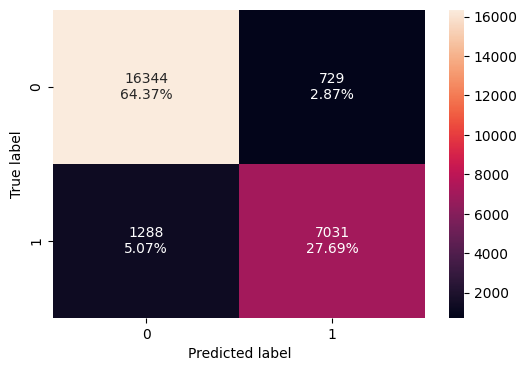

In [ ]:
confusion_matrix_sklearn(model=svm_rbf_c2_gamma3,predictors= X_train, target=y_train)
print("Training performance:")
model_rbf_kern_train_c2_gamma3 = model_performance_classification_sklearn(model=svm_rbf_c2_gamma3, predictors=X_train, target=y_train)
model_rbf_kern_train_c2_gamma3

Test performance:


,Accuracy,Recall,Precision,F1
0,0.867132,0.744251,0.832497,0.785905


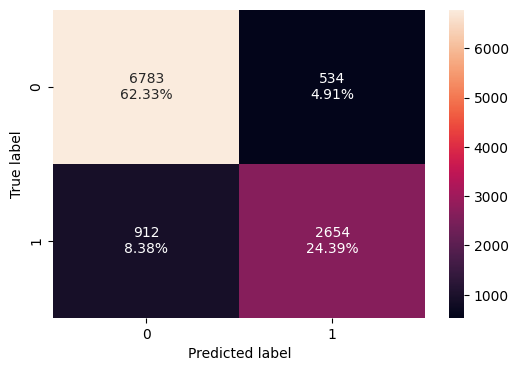

In [ ]:
confusion_matrix_sklearn(model=svm_rbf_c2_gamma3,predictors= X_test, target=y_test)
print("Test performance:")
model_rbf_kern_test_c2_gamma3 = model_performance_classification_sklearn(model=svm_rbf_c2_gamma3, predictors=X_test, target=y_test)
model_rbf_kern_test_c2_gamma3

Using Radial Basis Function Kernal, improved the model performance as it increased the recall as well as precision. However there is some kind of overfitting so we can try reducing the **C** parameter to make the model a little flexible

### Support Vector Machine (Kernel = "RBF", C=1.5, gamma=0.3)

In [ ]:
svm_rbf_c1_5_gamma3 = SVC(kernel='rbf', C=1.5, gamma=0.3)
svm_rbf_c1_5_gamma3.fit(X_train,y_train)

SVC(C=1.5, gamma=0.3)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.915721,0.833994,0.90139,0.866384


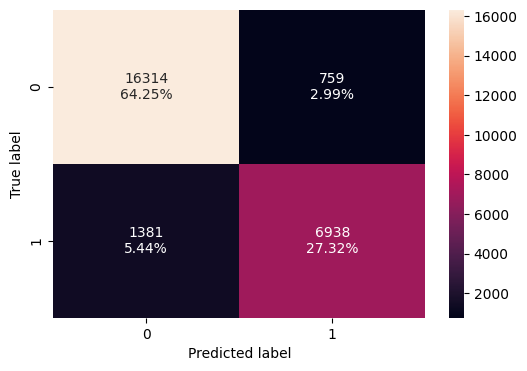

In [ ]:
confusion_matrix_sklearn(model=svm_rbf_c1_5_gamma3,predictors= X_train, target=y_train)
print("Training performance:")
model_rbf_kern_train_c1_5_gamma3 = model_performance_classification_sklearn(model=svm_rbf_c1_5_gamma3, predictors=X_train, target=y_train)
model_rbf_kern_train_c1_5_gamma3

Test performance:


,Accuracy,Recall,Precision,F1
0,0.867132,0.739484,0.836081,0.784821


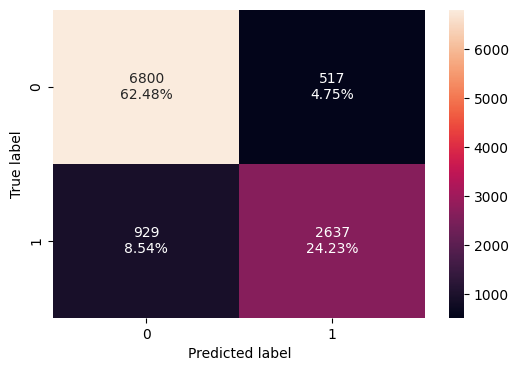

In [ ]:
confusion_matrix_sklearn(model=svm_rbf_c1_5_gamma3,predictors= X_test, target=y_test)
print("Test performance:")
model_rbf_kern_test_c1_5_gamma3 = model_performance_classification_sklearn(model=svm_rbf_c1_5_gamma3, predictors=X_test, target=y_test)
model_rbf_kern_test_c1_5_gamma3

This reduced the model metrics a little. Let's increase C and gamma

In [ ]:
svm_rbf_c2_5_gamma3_5 = SVC(kernel='rbf', C=2.5, gamma=0.35)
svm_rbf_c2_5_gamma3_5.fit(X_train,y_train)

SVC(C=2.5, gamma=0.35)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.930963,0.864527,0.919928,0.891368


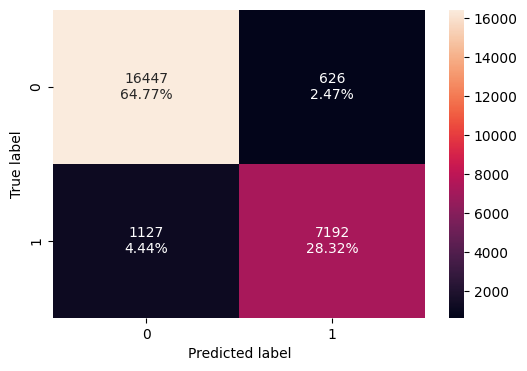

In [ ]:
confusion_matrix_sklearn(model=svm_rbf_c2_5_gamma3_5, predictors= X_train, target=y_train)
print("Training performance:")
model_rbf_kern_train_c2_5_gamma3_5 = model_performance_classification_sklearn(model=svm_rbf_c2_5_gamma3_5, predictors=X_train, target=y_train)
model_rbf_kern_train_c2_5_gamma3_5

Test performance:


,Accuracy,Recall,Precision,F1
0,0.867775,0.747616,0.831825,0.787476


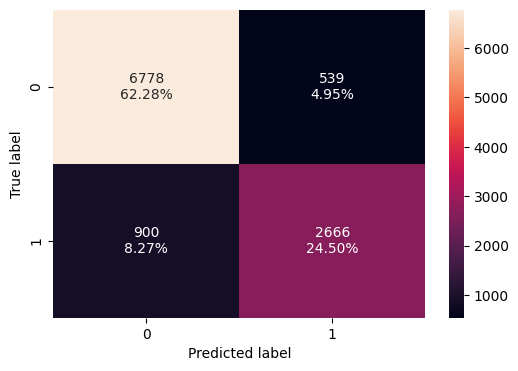

In [ ]:
confusion_matrix_sklearn(model=svm_rbf_c2_5_gamma3_5, predictors= X_test, target=y_test)
print("Test performance:")
model_rbf_kern_test_c2_5_gamma3_5 = model_performance_classification_sklearn(model=svm_rbf_c2_5_gamma3_5, predictors=X_test, target=y_test)
model_rbf_kern_test_c2_5_gamma3_5

### Support Vector Machine (Kernel = Polynomial, degree=2)

In [ ]:
svm_poly_2 = SVC(kernel='poly',degree=2)
svm_poly_2.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

Training performance:


,Accuracy,Recall,Precision,F1
0,0.810373,0.568818,0.79396,0.662792


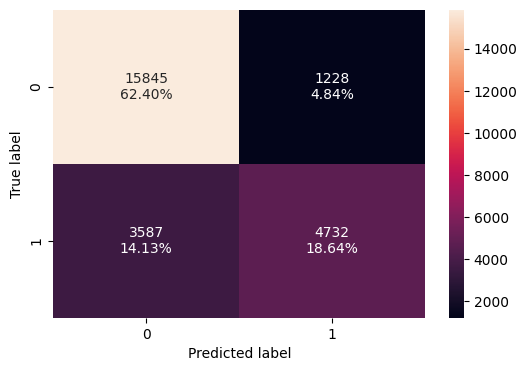

In [ ]:
confusion_matrix_sklearn(model=svm_poly_2, predictors= X_train, target=y_train)
print("Training performance:")
model_poly_kern_train_2 = model_performance_classification_sklearn(model=svm_poly_2, predictors=X_train, target=y_train)
model_poly_kern_train_2

Test performance:


,Accuracy,Recall,Precision,F1
0,0.811725,0.566181,0.800873,0.663381


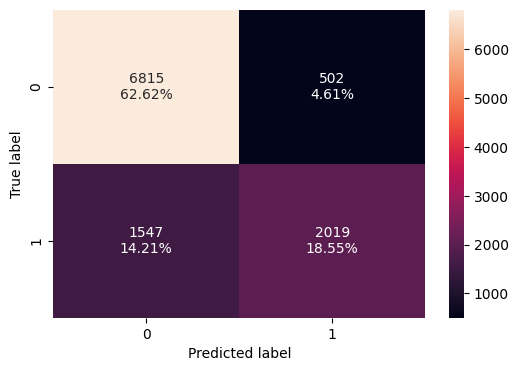

In [ ]:
confusion_matrix_sklearn(model=svm_poly_2, predictors= X_test, target=y_test)
print("Test performance:")
model_poly_kern_test_2 = model_performance_classification_sklearn(model=svm_poly_2, predictors=X_test, target=y_test)
model_poly_kern_test_2

Recall is decreased but precision has improved. This would mean that model is classifying as the booking would be cancelled even if the booking would not be cancelled

### Support Vector Machine (Kernel = Polynomial, degree=3)

In [ ]:
svm_poly_3 = SVC(kernel='poly',degree=3)
svm_poly_3.fit(X_train,y_train)

SVC(kernel='poly')

Training performance:


,Accuracy,Recall,Precision,F1
0,0.81057,0.535762,0.824607,0.649519


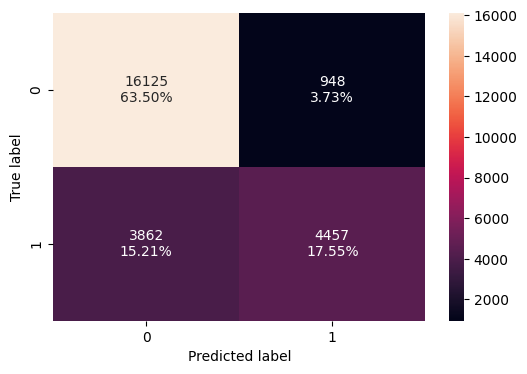

In [ ]:
confusion_matrix_sklearn(model=svm_poly_3, predictors= X_train, target=y_train)
print("Training performance:")
model_poly_kern_train_3 = model_performance_classification_sklearn(model=svm_poly_3, predictors=X_train, target=y_train)
model_poly_kern_train_3

Test performance:


,Accuracy,Recall,Precision,F1
0,0.809336,0.523836,0.832071,0.642919


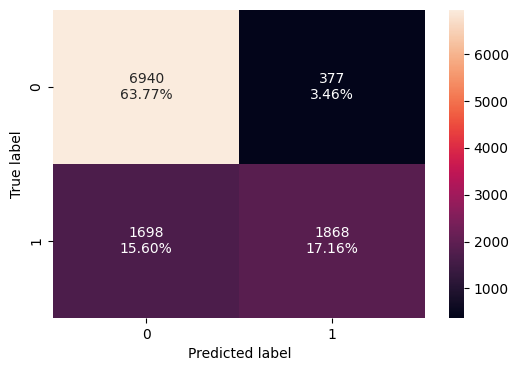

In [ ]:
confusion_matrix_sklearn(model=svm_poly_3, predictors= X_test, target=y_test)
print("Test performance:")
model_poly_kern_test_3 = model_performance_classification_sklearn(model=svm_poly_3, predictors=X_test, target=y_test)
model_poly_kern_test_3

Increasing the degree reduced recall but precision improved. Let's tune C and gamma

### Support Vector Machine (Kernel = Polynomial, degree=2, c=0.2, gamma=0.3)

In [ ]:
svm_poly_2_c2_gamma3 = SVC(kernel='poly',degree=2, C=0.2, gamma=0.3)
svm_poly_2_c2_gamma3.fit(X_train,y_train)

SVC(C=0.2, degree=2, gamma=0.3, kernel='poly')

Training performance:


,Accuracy,Recall,Precision,F1
0,0.828135,0.647193,0.790254,0.711605


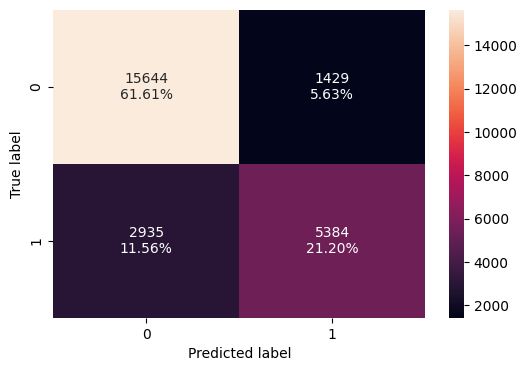

In [ ]:
confusion_matrix_sklearn(model=svm_poly_2_c2_gamma3, predictors= X_train, target=y_train)
print("Training performance:")
model_poly_kern_train_2_c2_gamma3 = model_performance_classification_sklearn(model=svm_poly_2_c2_gamma3, predictors=X_train, target=y_train)
model_poly_kern_train_2_c2_gamma3

Test performance:


,Accuracy,Recall,Precision,F1
0,0.825232,0.636848,0.78909,0.704842


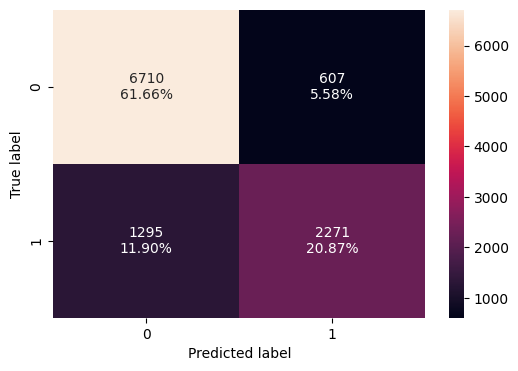

In [ ]:
confusion_matrix_sklearn(model=svm_poly_2_c2_gamma3, predictors= X_test, target=y_test)
print("Test performance:")
model_poly_kern_test_2_c2_gamma3 = model_performance_classification_sklearn(model=svm_poly_2_c2_gamma3, predictors=X_test, target=y_test)
model_poly_kern_test_2_c2_gamma3

# Model Performance Comparison and Final Model Selection

In [ ]:
def highlight_cols(s):
    color = 'blue'
    return 'background-color: %s' % color

In [ ]:
models_train_comp_df = pd.concat(
    [
        lr_model_train_perf.T,
        lr_model_train_perf_auc.T,
        lr_model_train_perf_prec.T,
        knn_perf_train_3.T,
        nb_perf_train.T,
        model_lin_kern_train.T,
        model_lin_kern_train_c2.T,
        model_lin_kern_train_c0_5.T,
        model_rbf_kern_train.T,
        model_rbf_kern_train_c2_gamma3.T,
        model_rbf_kern_train_c1_5_gamma3.T,
        model_poly_kern_train_2.T,
        model_poly_kern_train_3.T,
        model_poly_kern_test_2_c2_gamma3.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression under AUC",
    "Logistic Regression under Recall Precision Curve",
    "KNN with k=3",
    "Naive Bayes",
    "SVM-Linear Kernel",
    "SVM-Linear Kernel , C=2",
    "SVM-Linear Kernel , C=0.5",
    "SVM-RBF Kernel",
    "SVM-RBF Kernel, c=2, gamma=0.3",
    "SVM-RBF Kernel, c=1.5, gamma=0.3",
    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.2"
]

In [ ]:
best_perf_models_train=list(models_train_comp_df.idxmax(axis=1).value_counts().index)[0]
models_train_comp_df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, best_perf_models_train])

,Logistic Regression,Logistic Regression under AUC,Logistic Regression under Recall Precision Curve,KNN with k=3,Naive Bayes,SVM-Linear Kernel,"SVM-Linear Kernel , C=2","SVM-Linear Kernel , C=0.5",SVM-RBF Kernel,"SVM-RBF Kernel, c=2, gamma=0.3","SVM-RBF Kernel, c=1.5, gamma=0.3","SVM-Polynomial Kernel , degree = 2","SVM-Polynomial Kernel , degree = 3","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.2"
Accuracy,0.806317,0.783554,0.803836,0.915997,0.409420,0.804427,0.804584,0.804545,0.826560,0.920566,0.915721,0.810373,0.810570,0.825232
Recall,0.631446,0.768001,0.700565,0.853107,0.964178,0.614497,0.615338,0.614257,0.639019,0.845174,0.833994,0.568818,0.535762,0.636848
Precision,0.739338,0.641788,0.700649,0.886239,0.353053,0.743997,0.743933,0.744464,0.791425,0.906057,0.901390,0.793960,0.824607,0.789090
F1,0.681146,0.699245,0.700607,0.869358,0.516850,0.673074,0.673553,0.673121,0.707103,0.874557,0.866384,0.662792,0.649519,0.704842


In [ ]:
models_test_comp_df = pd.concat(
    [
        lr_model_test_perf.T,
        lr_model_test_perf_auc.T,
        lr_model_test_perf_prec.T,
        knn_perf_test_3.T,
        nb_perf_test.T,
        model_lin_kern_test.T,
        model_lin_kern_test_c2.T,
        model_lin_kern_test_c0_5.T,
        model_rbf_kern_test.T,
        model_rbf_kern_test_c2_gamma3.T,
        model_rbf_kern_test_c1_5_gamma3.T,
        model_poly_kern_test_2.T,
        model_poly_kern_test_3.T,
        model_poly_kern_test_2_c2_gamma3.T
    ],
    axis=1,
)
models_test_comp_df.columns = models_train_comp_df.columns
best_perf_models_test=list(models_test_comp_df.idxmax(axis=1).value_counts().index)[0]
models_test_comp_df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, best_perf_models_test])

,Logistic Regression,Logistic Regression under AUC,Logistic Regression under Recall Precision Curve,KNN with k=3,Naive Bayes,SVM-Linear Kernel,"SVM-Linear Kernel , C=2","SVM-Linear Kernel , C=0.5",SVM-RBF Kernel,"SVM-RBF Kernel, c=2, gamma=0.3","SVM-RBF Kernel, c=1.5, gamma=0.3","SVM-Polynomial Kernel , degree = 2","SVM-Polynomial Kernel , degree = 3","SVM-Polynomial Kernel , degree = 3 , gamma = 0.3 , C = 0.2"
Accuracy,0.803547,0.777175,0.797666,0.842231,0.407333,0.801709,0.801801,0.802169,0.823854,0.867132,0.867132,0.811725,0.809336,0.825232
Recall,0.625631,0.766966,0.695177,0.734997,0.962984,0.608245,0.608525,0.609366,0.627874,0.744251,0.739484,0.566181,0.523836,0.636848
Precision,0.735333,0.631786,0.689761,0.772473,0.352133,0.740273,0.740362,0.740880,0.791446,0.832497,0.836081,0.800873,0.832071,0.789090
F1,0.676061,0.692844,0.692458,0.753269,0.515693,0.667796,0.668001,0.668718,0.700235,0.785905,0.784821,0.663381,0.642919,0.704842


All Models had comparable performances with two models standing out.

**Naive Bayes**: Naive Bayes performed poorly in other metrics however The Recall metric is very high. This would lead to very high False Positive which would lead to hotel losing out customers on the basis of low customer statisfaction and would also lead to unneccessary overbooking.

**SVM-RBF Kernel, c=2, gamma=0.3**: SVM performed the best across all metrics as well among all the models. The Tradeoff between Recall and Precision is also minimal. The Hotel would be able to predict better when the booking would get cancelled.

# Business Recommendations

The following are the business recommendations to INN Hotels:
* The Hotel should give more group discounts irrespective of age and to smaller groups as well. This will promote goood word of mouth regarding the hotel
* The hotel should also do marketing or release special offers during the first six months to boost sales
* The Hotel should also provide more discounts on their online platforms as majority customers are online customers